#### **Starting**

In [4]:
pip install plotly dash pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 14.9 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


#### .

In [5]:
import pandas as pd
import dash
from dash import dcc, html
import plotly.express as px
from dash.dependencies import Input, Output
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px

import ipywidgets as widgets
from IPython.display import display, clear_output


In [125]:
df = pd.read_csv('/content/climate_change_dataset.csv')
df.head(2)

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0


In [126]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year


In [127]:
df['Date_Year'] = pd.to_datetime(df['Year'], format='%Y')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Year                         1000 non-null   int32         
 1   Country                      1000 non-null   object        
 2   Avg Temperature (°C)         1000 non-null   float64       
 3   CO2 Emissions (Tons/Capita)  1000 non-null   float64       
 4   Sea Level Rise (mm)          1000 non-null   float64       
 5   Rainfall (mm)                1000 non-null   int64         
 6   Population                   1000 non-null   int64         
 7   Renewable Energy (%)         1000 non-null   float64       
 8   Extreme Weather Events       1000 non-null   int64         
 9   Forest Area (%)              1000 non-null   float64       
 10  Date_Year                    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int32(1), 

In [ ]:
df.head(2)

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),ISO Country Code,Rainfall (mm)_per_100,Pop_Density(per_100m),Continent,Date_Year
0,2023,Indonesia,28.5,16.5,3.8,2736,866280953,16.1,12,23.0,IDN,27.36,8.66,Asia,2023-01-01
1,2023,UK,33.5,9.1,4.2,534,828538833,14.3,10,53.8,GBR,5.34,8.29,Europe,2023-01-01


In [ ]:
df_cop = df.copy()

In [ ]:
# df.columns.tolist()

# df.rename(
#     columns={
#         'Country': 'country',
#         'Continent': 'continent'
#     }
# )

### **Feature Engineering**

In [ ]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)', 'ISO Country Code'],
      dtype='object')

In [128]:
import numpy as np

df['Rainfall (mm)_per_100'] = df['Rainfall (mm)']/ 100
df['Pop_Density(per_100m)'] = round(df['Population']/ 100_000_000, 2)
df.head(3)



,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Date_Year,Rainfall (mm)_per_100,Pop_Density(per_100m)
0,2006,UK,8.9,9.3,3.1,1441,530911230,20.4,14,59.8,2006-01-01,14.41,5.31
1,2019,USA,31.0,4.8,4.2,2407,107364344,49.2,8,31.0,2019-01-01,24.07,1.07
2,2014,France,33.9,2.8,2.2,1241,441101758,33.3,9,35.5,2014-01-01,12.41,4.41


In [129]:
country_iso_mapping = {
    'UK': 'GBR',
    'USA': 'USA',
    'France': 'FRA',
    'Argentina': 'ARG',
    'Germany': 'DEU',
    'China': 'CHN',
    'South Africa': 'ZAF',
    'Australia': 'AUS',
    'Indonesia': 'IDN',
    'Brazil': 'BRA',
    'India': 'IND',
    'Russia': 'RUS',
    'Canada': 'CAN',
    'Mexico': 'MEX',
    'Japan': 'JPN'
}

# Apply this mapping to your dataframe's 'Country' column
df['ISO Country Code'] = df['Country'].map(country_iso_mapping)

In [ ]:
df['ISO Country Code'].unique()

array(['GBR', 'USA', 'FRA', 'ARG', 'DEU', 'CHN', 'ZAF', 'AUS', 'IDN',
       'BRA', 'IND', 'RUS', 'CAN', 'MEX', 'JPN'], dtype=object)

##### stuff

In [12]:
 pip install pycountry_convert


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 13.3 MB/s eta 0:00:00


##### cont

In [13]:
import pycountry_convert as pc

# List of countries using their ISO alpha-2 country codes
iso_country_codes = ['GB', 'US', 'FR', 'AR', 'DE', 'CN', 'ZA', 'AU', 'ID', 'BR', 'IN', 'RU', 'CA', 'MX', 'JP']
# iso_country_codes = ['GBR', 'USA', 'FRA', 'ARG', 'DEU', 'CHN', 'ZAF', 'AUS', 'IDN','BRA', 'IND', 'RUS', 'CAN', 'MEX', 'JPN']

# Function to get continent from ISO country code
def get_continent(country_code):
    try:
        # Get continent code from the country alpha-2 code
        continent = pc.country_alpha2_to_continent_code(country_code)

        # Map continent codes to continent names
        if continent == 'NA': continent = 'North America'
        elif continent == 'SA': continent = 'South America'
        elif continent == 'EU': continent = 'Europe'
        elif continent == 'AS': continent = 'Asia'
        elif continent == 'AF': continent = 'Africa'
        elif continent == 'OC': continent = 'Oceania'

        return continent
    except KeyError:
        return None  # If country code is not recognized

# Map ISO country codes to continents
country_to_continent = {code: get_continent(code) for code in iso_country_codes}

# Show the result
print(country_to_continent)



{'GB': 'Europe', 'US': 'North America', 'FR': 'Europe', 'AR': 'South America', 'DE': 'Europe', 'CN': 'Asia', 'ZA': 'Africa', 'AU': 'Oceania', 'ID': 'Asia', 'BR': 'South America', 'IN': 'Asia', 'RU': 'Europe', 'CA': 'North America', 'MX': 'North America', 'JP': 'Asia'}


In [130]:
country_to_continent = {'GBR': 'Europe', 'USA': 'North America', 'FRA': 'Europe', 'ARG': 'South America',
                        'DEU': 'Europe', 'CHN': 'Asia', 'ZAF': 'Africa', 'AUS': 'Oceania', 'IDN': 'Asia',
                        'BRA': 'South America', 'IND': 'Asia', 'RUS': 'Europe', 'CAN': 'North America',
                        'MEX': 'North America', 'JPN': 'Asia'}

In [131]:
df['Continent'] = df['ISO Country Code'].map(country_to_continent)

In [132]:
df = df.sort_values(by='Year',ascending = False).reset_index(drop=True)
df.head(5)

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Date_Year,Rainfall (mm)_per_100,Pop_Density(per_100m),ISO Country Code,Continent
0,2023,China,12.0,16.9,2.8,2520,508830032,21.0,3,59.9,2023-01-01,25.20,5.09,CHN,Asia
1,2023,Germany,32.4,12.0,1.5,1832,555356797,6.0,2,50.9,2023-01-01,18.32,5.55,DEU,Europe
2,2023,Argentina,22.4,4.4,1.0,2857,94830920,49.5,11,44.2,2023-01-01,28.57,0.95,ARG,South America
3,2023,Germany,18.3,4.2,3.0,2976,1017684486,40.2,1,52.5,2023-01-01,29.76,10.18,DEU,Europe
4,2023,USA,12.6,1.1,1.9,1594,572998076,8.9,0,63.9,2023-01-01,15.94,5.73,USA,North America


In [ ]:
df['Continent'].unique()

array(['Asia', 'Europe', 'North America', 'Africa', 'South America',
       'Oceania'], dtype=object)

### **Descriptive Analysis**

2. No of unique countries, no of years

In [ ]:
# count of yearly occurence, countries, regions. use bargraph or ie chart

### **Exploratory Data Analysis**

#### kde per region

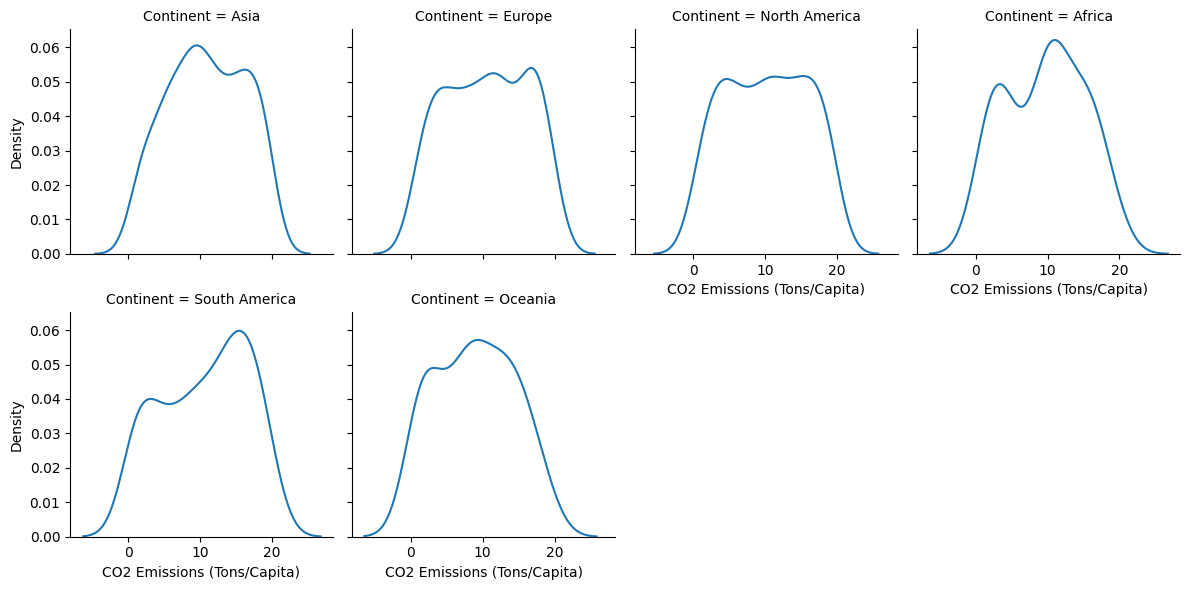

In [ ]:
g = sns.FacetGrid(df, col="Continent", col_wrap=4, height=3)
g.map(sns.kdeplot, 'CO2 Emissions (Tons/Capita)', fill=False)

plt.show()


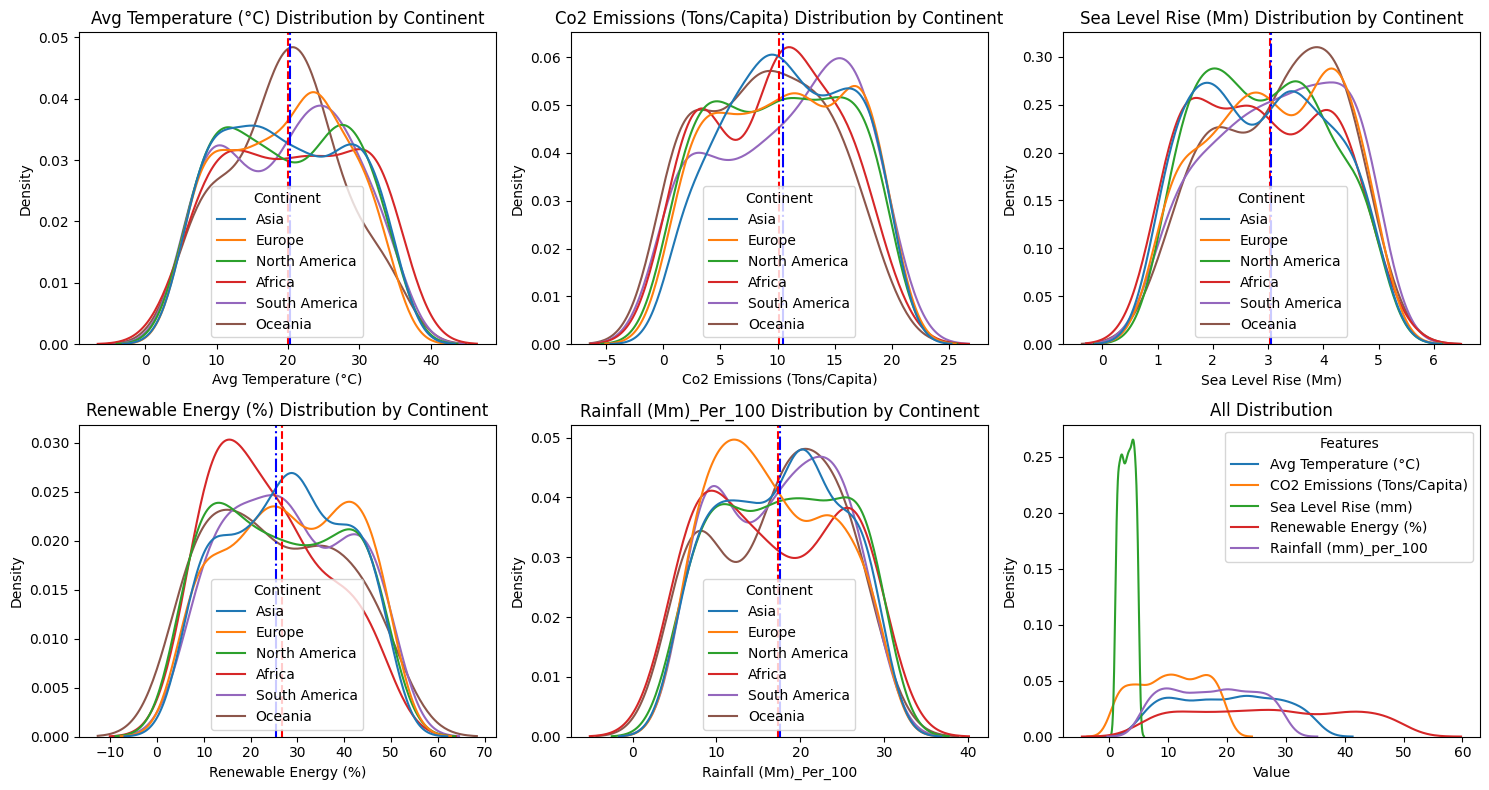

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to plot
cols = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)',
        'Renewable Energy (%)', 'Rainfall (mm)_per_100']

# Create a 2x3 grid of subplots (adjusted for the number of plots)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Loop through columns and plot each on a separate axis
for idx, col in enumerate(cols):

    mean_of_means = df.groupby('Continent')[col].mean().mean()
    mean_of_medians = df.groupby('Continent')[col].median().mean()

    # KDE plot with 'Continent' hue
    sns.kdeplot(data=df, x=col, hue='Continent', fill=False, common_norm=False, ax=axes[idx])

    # Set the title and labels for each subplot
    axes[idx].set_title(f'{col.title()} Distribution by Continent')
    axes[idx].set_xlabel(f'{col.title()}')
    axes[idx].set_ylabel('Density')

    handles, labels = axes[idx].get_legend_handles_labels()
    if handles:
        axes[idx].legend(handles=handles, labels=labels, title='Continent')
    # Add vertical lines for mean and median
    axes[idx].axvline(mean_of_means, color='red', linestyle='--', label=f'Mean ({mean_of_means:.2f})')
    axes[idx].axvline(mean_of_medians, color='blue', linestyle='-.', label=f'Median ({mean_of_medians:.2f})')


for col in cols:
    # KDE plot with 'Continent' hue
    sns.kdeplot(data=df, x= col , fill=False, common_norm=False, ax=axes[5], label = col)
    axes[5].set_title(f'All Distribution')

# Custom legend for the last plot (axes[5])
axes[5].set_title(f'All Distribution')
axes[5].set_xlabel('Value')
axes[5].set_ylabel('Density')

# Manually set the legend with custom labels
axes[5].legend(title='Features')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


**We search for normality across the years for each variable because it informs us that any insights made from the line plot afterwards is statistically correct**

In [ ]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)', 'ISO Country Code', 'Rainfall (mm)_per_100',
       'Pop_Density(per_100m)', 'Continent', 'Date_Year'],
      dtype='object')

In [ ]:
cols_ = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)',
        'Rainfall (mm)_per_100', 'Pop_Density(per_100m)', 'Renewable Energy (%)', 'Extreme Weather Events',
        'Forest Area (%)']

In [ ]:
# Initialize an empty list to store the results
normality_results = []

# Group data by 'Year' and 'Continent' and calculate the mean for each feature
year_continent_grouped = df.groupby(['Year', 'Continent'])[cols_].mean().reset_index()

# Loop through each column (feature)
for col in cols_:
    # Loop through each continent
    for continent in year_continent_grouped['Continent'].unique():
        # Get the data for the specific continent and feature
        data = year_continent_grouped[year_continent_grouped['Continent'] == continent][col].dropna()

        # Perform the Shapiro-Wilk test for normality
        stat, p_value = stats.shapiro(data)

        # Determine if the data is normal based on the p-value
        normality_result = 'Normal' if p_value > 0.05 else 'Not Normal'

        # Append the result to the list
        normality_results.append({
            'Feature': col,
            'Continent': continent,
            'Shapiro-Wilk p-value': p_value,
            'Normality Test Result': normality_result
        })

# Convert the results into a DataFrame
normality_results_df = pd.DataFrame(normality_results)

"""
If p-value > 0.05: The result is not statistically significant, meaning that there is no evidence to reject the null hypothesis.
Thus, you fail to reject the null hypothesis, implying that the data is consistent with a normal distribution.
"""
# Display the normality test results DataFrame


print('Done')



'\nIf p-value > 0.05: The result is not statistically significant, meaning that there is no evidence to reject the null hypothesis. \nThus, you fail to reject the null hypothesis, implying that the data is consistent with a normal distribution.\n'

In [ ]:
normality_results_df.groupby('Feature')['Normality Test Result'].value_counts()

# so data per all continent is normal. We can do ANOVA

Feature                      Normality Test Result
Avg Temperature (°C)         Normal                   6
CO2 Emissions (Tons/Capita)  Normal                   5
                             Not Normal               1
Extreme Weather Events       Normal                   6
Forest Area (%)              Normal                   6
Pop_Density(per_100m)        Normal                   6
Rainfall (mm)_per_100        Normal                   6
Renewable Energy (%)         Normal                   6
Sea Level Rise (mm)          Normal                   6
Name: count, dtype: int64

#### **Univariate Analysis**: Primary purpose is to describe just one data set on its own, with the mean median mode, variability. We can do histograms, count bar chart and box plots etc (it could be the same column but diff categories there).Only analyzes one variable at a time.


1. Histogram, kde plot for  eg percentage items, extreme weather etc
2. Line plot of mean continous data per year, showing the percentage increase each year.


##### 1

Text(0.5, 1.0, 'Distribution Plot of Avg Temperature (°C)')

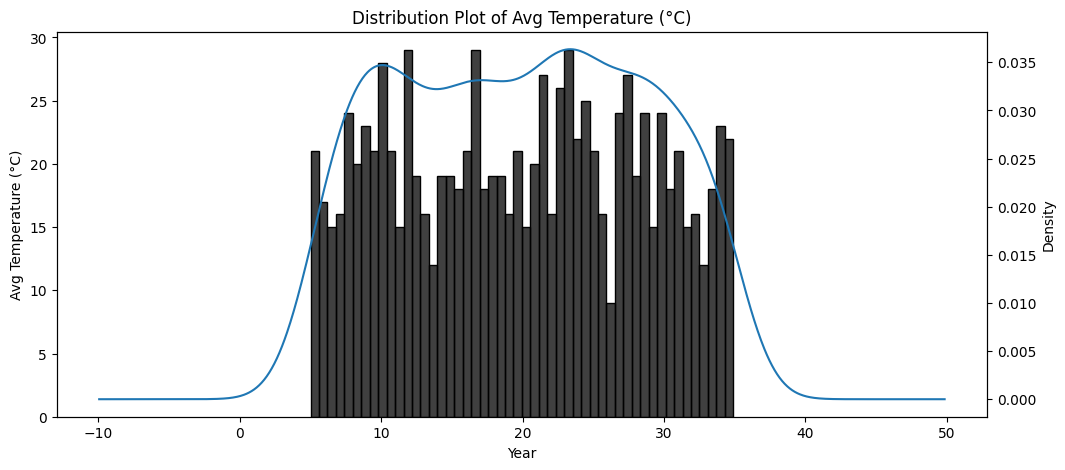

In [ ]:


column_to_plot = 'Avg Temperature (°C)'  # You can change this to another column name


fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot the line plot using Seaborn
# sns.displot(x = year[column_to_plot], ax=ax1, color='k', bins = 20)
sns.histplot(x = df[column_to_plot], ax=ax1, color='k', bins = 50)

ax2 = ax1.twinx()

df[column_to_plot].plot(kind='kde', ax=ax2, color='tab:blue')


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel(column_to_plot)
plt.title(f'Distribution Plot of {column_to_plot}')

In [269]:
cols_ = ['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']

In [270]:
import ipywidgets as widgets
from ipywidgets import interactive

# Assuming df is your DataFrame
# You can change this to a list of column names based on the dataset you're using
column_names = df.columns.tolist()

# Function to plot the histogram and KDE for the selected feature
def plot_feature_distribution(column_to_plot):
    # Create the figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 5))

    # Plot the histogram using Seaborn
    sns.histplot(df[column_to_plot], ax=ax1, color='k', bins=50)

    ax2 = ax1.twinx()
    try:
        df[column_to_plot].plot(kind='kde', ax=ax2, color='tab:blue')
    except TypeError:
        print(f"Cannot plot KDE for {column_to_plot} because it's not numeric. Skipping KDE plot.")
    # Create a twin axis to plot the KDE

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adding labels and title
    ax1.set_xlabel('Range')
    ax1.set_ylabel(column_to_plot)
    plt.title(f'Distribution Plot of {column_to_plot}')

    # Display the plot
    plt.show()

# Create a dropdown widget for selecting the column
dropdown = widgets.Dropdown(
    options=column_names,
    description='Select Feature:',
    value=column_names[0]  # Default value
)

# Create the interactive plot
interactive_plot = interactive(plot_feature_distribution, column_to_plot=dropdown)

# Display the interactive widget
interactive_plot


interactive(children=(Dropdown(description='Select Feature:', options=('Year', 'Country', 'Avg Temperature (°C…

In [ ]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)', 'ISO Country Code', 'Rainfall (mm)_per_100',
       'Pop_Density(per_100m)', 'Continent', 'Date_Year'],
      dtype='object')

##### 2.

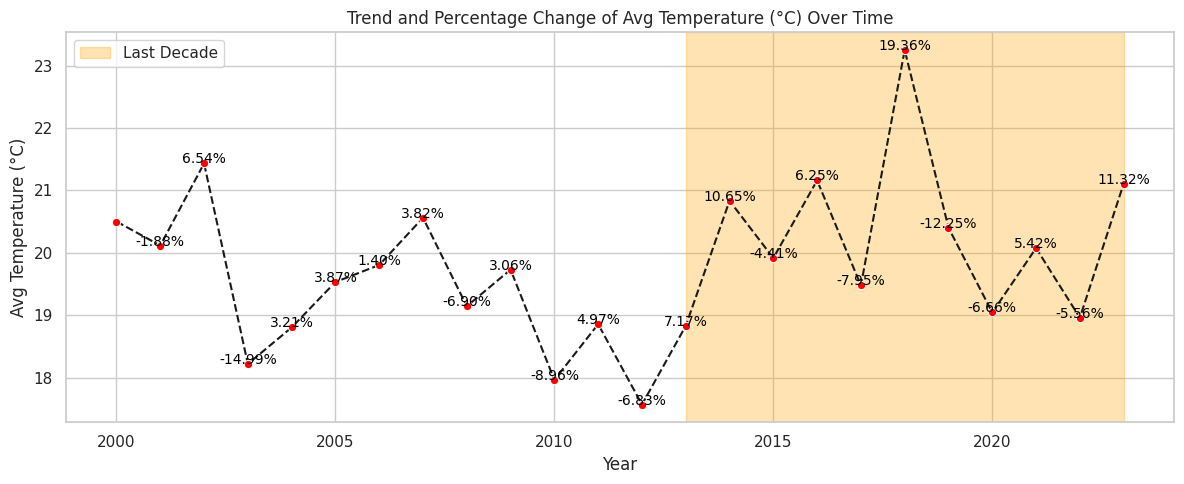

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

column_to_plot = 'Avg Temperature (°C)'  # You can change this to another column name

# Group by 'Year' and calculate the mean for each feature
year = df.groupby('Year')[cols_].mean().reset_index()

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot the line plot using Seaborn
sns.lineplot(x='Year', y=column_to_plot, data=year, ax=ax1, color='k', marker = 'o', linestyle = '--'
             , markerfacecolor='red')



# Calculate the percentage change and multiply by 100 to get it as a percentage
year['pct_change'] = year[column_to_plot].pct_change() * 100

# Annotate the percentage change per year on the plot
for i, value in enumerate(year['pct_change']):
    if pd.notna(value):  # Avoid annotating NaN (first row)
        ax1.text(year['Year'].iloc[i], year[column_to_plot].iloc[i], f'{value:.2f}%', ha='center', color='black', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel(column_to_plot)
plt.title(f'Trend and Percentage Change of {column_to_plot} Over Time')

plt.xticks(rotation=0)

plt.axvspan(2013, 2023, color="orange", alpha=0.3, label="Last Decade")
plt.legend()

# Show the plot
plt.tight_layout()

plt.show()




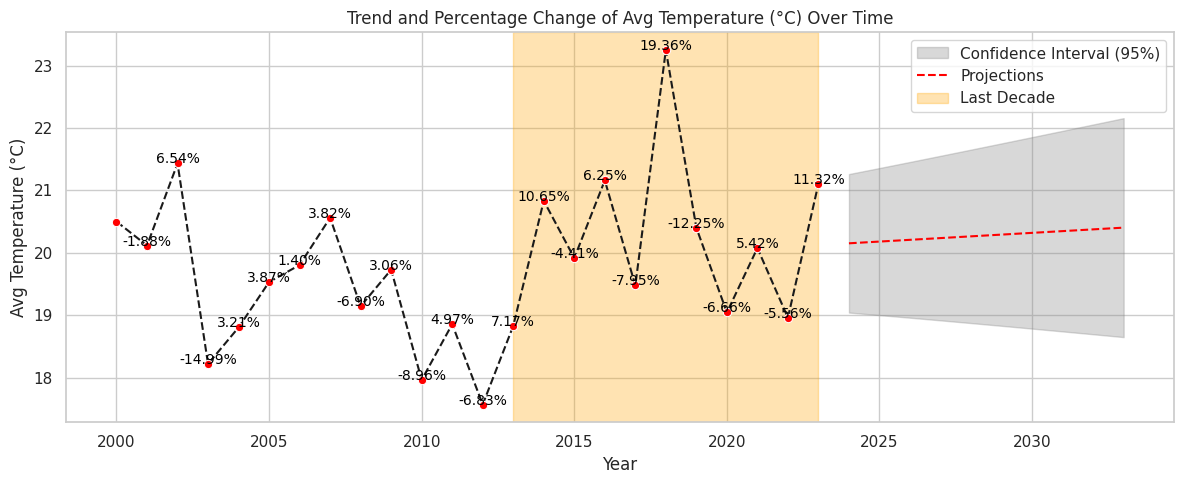

Mean Absolute Error (MAE) on training data: 0.95
Model Accuracy: 95.20%
The model has reached a minimum accuracy of 85%


In [280]:
import statsmodels.api as sm

# Linear Regression for global temperature projection
X = year['Year'].values.reshape(-1, 1)  # Year as independent variable
y = year[column_to_plot].values  # Temperature as dependent variable

# Adding a constant for the intercept (linear model)
X = sm.add_constant(X)

# Building a regression model
model = sm.OLS(y, X).fit()


# Temperature projections for the next 10 years (current year + 10 years)
future_years = np.array([year['Year'].max() + i for i in range(1, 11)]).reshape(-1, 1)
future_years_with_const = sm.add_constant(future_years)
future_temp_predictions = model.predict(future_years_with_const)

# Displaying temperature projections
# for year, val in zip(future_years.flatten(), future_temp_predictions):
#     print(f"Temperature projections for year {year}: {val:.2f}°C")

# Calculates Confidence Interval (CI) for projections
predictions_with_ci = model.get_prediction(future_years_with_const)
ci_lower, ci_upper = predictions_with_ci.conf_int(alpha=0.05).T

# Visualization of valueprojections with CI


# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot the line plot using Seaborn
sns.lineplot(x='Year', y=column_to_plot, data=year, ax=ax1, color='k', marker = 'o', linestyle = '--'
             , markerfacecolor='red')
plt.fill_between(future_years.flatten(), ci_lower, ci_upper, color='gray', alpha=0.3, label='Confidence Interval (95%)')
plt.plot(future_years, future_temp_predictions, label= 'Projections', color='red', linestyle='--')



# Calculate the percentage change and multiply by 100 to get it as a percentage
year['pct_change'] = year[column_to_plot].pct_change() * 100

# Annotate the percentage change per year on the plot
for i, value in enumerate(year['pct_change']):
    if pd.notna(value):  # Avoid annotating NaN (first row)
        ax1.text(year['Year'].iloc[i], year[column_to_plot].iloc[i], f'{value:.2f}%', ha='center', color='black', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel(column_to_plot)
plt.title(f'Trend and Percentage Change of {column_to_plot} Over Time')

plt.xticks(rotation=0)

plt.axvspan(2013, 2023, color="orange", alpha=0.3, label="Last Decade")
plt.legend()

# Show the plot
plt.tight_layout()

plt.show()

# Model evaluation using MAE (Mean Absolute Error)
mae = np.mean(np.abs(y - model.predict(X)))
print(f"Mean Absolute Error (MAE) on training data: {mae:.2f}")

# Check model accuracy
accuracy = 100 - (mae / np.mean(y) * 100)
print(f"Model Accuracy: {accuracy:.2f}%")

# Projection accuracy of at least 85% based on MAE
if accuracy >= 85:
    print("The model has reached a minimum accuracy of 85%")
else:
    print("The model has not reached a minimum accuracy of 85%")

**Interactive plot 1**

In [262]:
print(cols_)

['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)_per_100', 'Pop_Density(per_100m)', 'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)']


In [281]:
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interactive
import pandas as pd

# List of columns you're interested in
column_names = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)_per_100', 'Pop_Density(per_100m)', 'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)']

# Function to plot the selected feature against 'Year' and annotate percentage change
def plot_feature_against_year(column_to_plot):
    # Group by 'Year' and calculate the mean for each feature
    year = df.groupby('Year')[column_names].mean().reset_index()

    # Linear Regression for global temperature projection
    X = year['Year'].values.reshape(-1, 1)  # Year as independent variable
    y = year[column_to_plot].values  # Temperature as dependent variable

    # Adding a constant for the intercept (linear model)
    X = sm.add_constant(X)

    # Building a regression model
    model = sm.OLS(y, X).fit()


    # Temperature projections for the next 10 years (current year + 10 years)
    future_years = np.array([year['Year'].max() + i for i in range(1, 11)]).reshape(-1, 1)
    future_years_with_const = sm.add_constant(future_years)
    future_temp_predictions = model.predict(future_years_with_const)


    # Calculates Confidence Interval (CI) for projections
    predictions_with_ci = model.get_prediction(future_years_with_const)
    ci_lower, ci_upper = predictions_with_ci.conf_int(alpha=0.05).T

    fig, ax1 = plt.subplots(figsize=(12, 5))


    sns.lineplot(x='Year', y=column_to_plot, data=year, ax=ax1, color='k', marker='o', linestyle='--', markerfacecolor='red')
    plt.fill_between(future_years.flatten(), ci_lower, ci_upper, color='gray', alpha=0.3, label='Confidence Interval (95%)')
    plt.plot(future_years, future_temp_predictions, label= 'Projections', color='red', linestyle='--')


    # Calculate the percentage change and multiply by 100 to get it as a percentage
    year['pct_change'] = year[column_to_plot].pct_change() * 100

    # Annotate the percentage change per year on the plot
    for i, value in enumerate(year['pct_change']):
        if pd.notna(value):  # Avoid annotating NaN (first row)
            ax1.text(year['Year'].iloc[i], year[column_to_plot].iloc[i], f'{value:.2f}%', ha='center', color='black', fontsize=10)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adding labels and title
    ax1.set_xlabel('Year')
    ax1.set_ylabel(column_to_plot)
    plt.title(f'Trend and Percentage Change of {column_to_plot} Over Time')

    # Show the plot
    plt.xticks(rotation=0)

    plt.axvspan(2013, 2023, color="orange", alpha=0.3, label="Last Decade")
    plt.legend()

    plt.tight_layout()
    plt.show()
    # Model evaluation using MAE (Mean Absolute Error)
    mae = np.mean(np.abs(y - model.predict(X)))
    print(f"Mean Absolute Error (MAE) on training data: {mae:.2f}")

    # Check model accuracy
    accuracy = 100 - (mae / np.mean(y) * 100)
    print(f"Model Accuracy: {accuracy:.2f}%")

    # Projection accuracy of at least 85% based on MAE
    if accuracy >= 85:
        print("The model has reached a minimum accuracy of 85%")
    else:
        print("The model has not reached a minimum accuracy of 85%")

# Create a dropdown widget for selecting the column (feature)
dropdown = widgets.Dropdown(
    options=column_names,
    description='Select Feature:',
    value=column_names[0]  # Default value
)

# Create the interactive plot
interactive_plot = interactive(plot_feature_against_year, column_to_plot=dropdown)

# Display the interactive widget
interactive_plot


interactive(children=(Dropdown(description='Select Feature:', options=('Avg Temperature (°C)', 'CO2 Emissions …

**Interactive plot 2**

In [258]:
cols_

['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']

In [261]:
import plotly.graph_objects as go
import pandas as pd

# Group by 'Year' and calculate the mean for each feature
mean_df_ = df.groupby('Year')[cols_].mean()

# Calculate the percentage change per year for each feature
pct_change_df = mean_df_.pct_change() * 100  # Percentage change per year (multiply by 100 for percentage)

# Create a dropdown list with feature names for selection
dropdown_buttons = [
    {'label': feature, 'method': 'update', 'args': [{'y': [mean_df_[feature], mean_df_[feature]]},
                                                  {'title': f'Trend of {feature} over Time',
                                                   'yaxis': {'title': feature},
                                                   'mode': 'lines+markers'}]}
    for feature in cols_
]

# Initial plot for the first feature with both line and scatter plot
initial_feature = cols_[0]

# Create a list of annotations for percentage changes
annotations = []
for i in range(1, len(mean_df_)):  # Start from the second year
    year = mean_df_.index[i]
    percent_change = pct_change_df[initial_feature].iloc[i]
    annotations.append(
        dict(
            x=mean_df_.index[i],
            y=mean_df_[initial_feature].iloc[i],
            text=f'{percent_change:.2f}%',  # Show the percentage change as text
            showarrow=True,
            arrowhead=2,
            ax=0,
            ay=-40,
            font=dict(size=10, color="black")
        )
    )

# Create the initial plot with line and scatter plot for the first feature
initial_plot = go.Figure(
    data=[
        go.Scatter(x=mean_df_.index, y=mean_df_[initial_feature], mode='lines+markers', name=initial_feature),  # Line with markers (scatter)
    ],
    layout={
        'title': f'Trend of {initial_feature} over Time',
        'xaxis': {'title': 'Year'},
        'yaxis': {'title': initial_feature},
        'updatemenus': [
            {
                'buttons': dropdown_buttons,
                'direction': 'down',
                'showactive': True,
                'active': 0,
                'x': 0.17,
                'xanchor': 'left',
                'y': 1.15,
                'yanchor': 'top'
            }
        ],
        'annotations': annotations  # Add annotations to the plot
    }
)

# Show the plot
initial_plot.show()


#### **Bivariate**

1. Line plot of variables (y axis) per year (x axis) for all variables.
2. Similar to one but for region groups for continous data. eg trend of just co2 emission, one at a time

    Like we should have a selector for each variable?
    We could also have a selector that may filter the data to just a given continent.

2. Stacked bar plot of population per a hundred thousand persons (y axis)...per year year (x axis) for each region (stacks)
3. Do a mean bar chart data on y, and country on x.let x label be at angle 90

4. scatter plot of continos data with data points the country and legends being the continent, we need a slider that takes us through the years for this one

##### Normalty Testing

In [ ]:
# checking normality by year first

variables = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)',
             'Rainfall (mm)', 'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
             'Forest Area (%)']

# Initialize an empty list to store the results
shapiro_results = []

# Loop over each feature in the variables list
for var in variables:
    # Loop over each country in the dataset
    for year in df['Date_Year'].unique():

        year_data = df[df['Date_Year'] == year][var]

        # Perform the Shapiro-Wilk test on the individual values of that country and feature
        stat, p_value = stats.shapiro(year_data)

        reject_null = 'Non-Normal' if p_value < 0.05 else 'Normally Distributed'

        #
        shapiro_results.append({
            'Year': year,
            'Feature': var,
            'Statistic': stat,
            'P-Value': p_value,
            'Result': reject_null
        })

# Convert the list of results to a DataFrame
shapiro_df = pd.DataFrame(shapiro_results)

shapiro_df


,Year,Feature,Statistic,P-Value,Result
0,2023-01-01,Avg Temperature (°C),0.935355,0.019719,Non-Normal
1,2022-01-01,Avg Temperature (°C),0.942046,0.025584,Non-Normal
2,2021-01-01,Avg Temperature (°C),0.957681,0.093118,Normally Distributed
3,2020-01-01,Avg Temperature (°C),0.942685,0.032400,Non-Normal
4,2019-01-01,Avg Temperature (°C),0.959829,0.165252,Normally Distributed
...,...,...,...,...,...
187,2004-01-01,Forest Area (%),0.970425,0.240829,Normally Distributed
188,2003-01-01,Forest Area (%),0.959569,0.151924,Normally Distributed
189,2002-01-01,Forest Area (%),0.915817,0.001483,Non-Normal
190,2001-01-01,Forest Area (%),0.915363,0.004865,Non-Normal


<Axes: xlabel='year'>

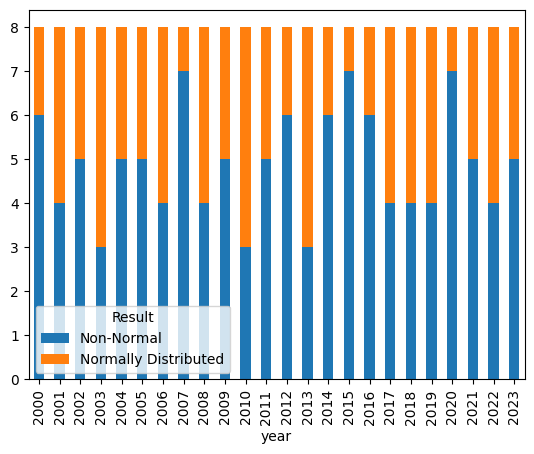

In [ ]:
# shapiro_df.groupby('Year')['Result'].value_counts()
shapiro_df['year'] = shapiro_df['Year'].dt.year
shapiro_df.groupby('year')['Result'].value_counts().unstack().plot(kind='bar', stacked=True)


Given that half of the features were normally distributed by year, I recommend grouping by year and using the mean values as the dot points for each feature. This will allow you to capture the overall trend without being overly influenced by outliers or non-normal data.

In [ ]:
bar_df = df.copy()
bar_df.columns

Index(['Country', 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)',
       'Sea Level Rise (mm)', 'Rainfall (mm)', 'Population',
       'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)',
       'ISO Country Code', 'Rainfall (mm)_per_100', 'Pop_Density(per_100m)',
       'Continent', 'Date_Year'],
      dtype='object')

In [ ]:
cols = [ 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)',
       'Sea Level Rise (mm)', 'Renewable Energy (%)',  'Rainfall (mm)_per_100']

# Group by 'Date_Year' and calculate the mean for each feature
mean_df = bar_df.groupby('Year')[cols].median().reset_index()
mean_df.head(2)

,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Renewable Energy (%),Rainfall (mm)_per_100
0,2000,20.0,11.9,2.8,29.5,18.42
1,2001,21.2,9.7,3.3,24.9,18.56


##### 1.

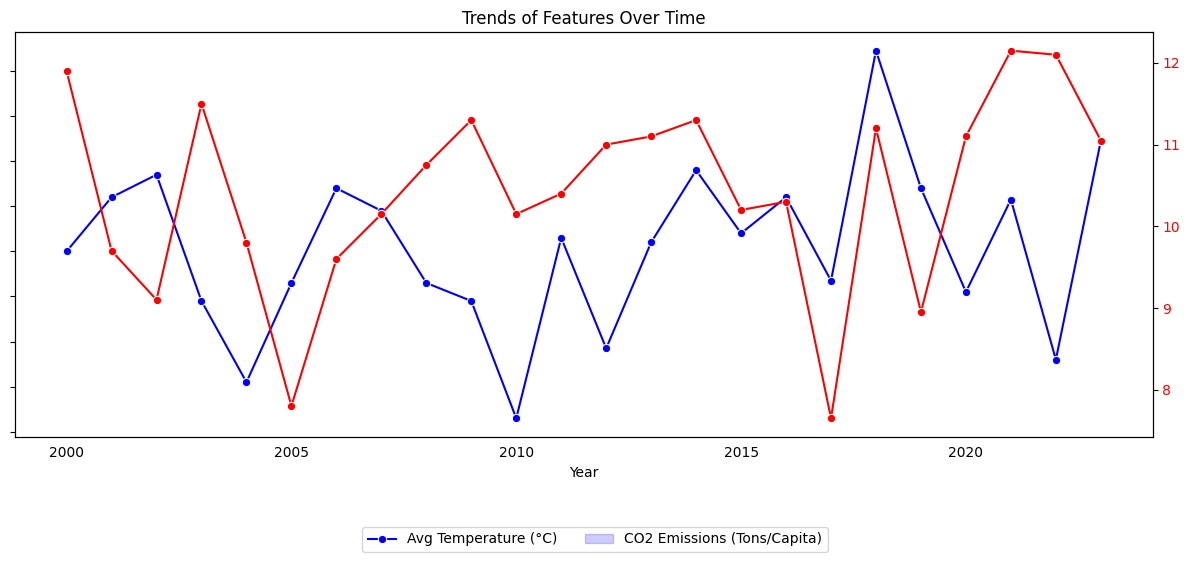

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot the first feature (on the primary y-axis)
sns.lineplot(data=mean_df, x='Year', y='Avg Temperature (°C)', ax=ax1, marker='o', color='b', legend=False)
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelcolor='b', labelleft=False, left=False)

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Plot another feature on the second y-axis (on the secondary y-axis)
sns.lineplot(data=mean_df, x='Year', y='CO2 Emissions (Tons/Capita)', ax=ax2, marker='o', color='r', legend=False)
ax2.set_ylabel('')  # Remove the secondary axis label
ax2.tick_params(axis='y', labelcolor='r', labelleft=False, left=False)  # Remove the ticks and labels for the second axis

# Remove x-axis ticks (optional, depending on whether you want them)
ax1.tick_params(axis='x', labelleft=False, bottom=False)

# Add the x-axis label and title
ax1.set_xlabel('Year')
plt.title('Trends of Features Over Time')

# Manually add the legend below the plot
fig.legend(['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)'], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Show the plot
plt.tight_layout()
plt.show()


##### 2.

If you go down to the ANOVA ground. This plot easily shows no trend per region , backed by ANOVA

In [138]:
grouped = df.groupby(['Continent' , 'Year'])[cols_].mean().reset_index()

grouped.head(2)

,Continent,Year,CO2 Emissions (Tons/Capita),Avg Temperature (°C),Rainfall (mm)_per_100,Pop_Density(per_100m)
0,Africa,2000,13.985714,26.114286,21.898571,5.392857
1,Africa,2001,4.500000,21.725000,15.025000,9.215000


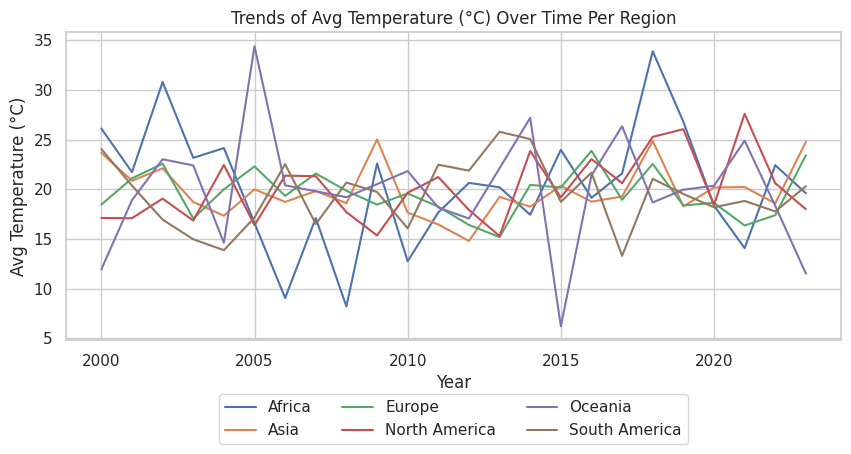

In [158]:
plt.figure(figsize=(10, 4))

feature = 'Avg Temperature (°C)'
# Plot the line plot using Seaborn
sns.lineplot(data=grouped, x='Year', y= feature, hue='Continent')

# Move the legend to the bottom
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title(f'Trends of {feature} Over Time Per Region')
plt.show()

In [162]:
y_axis_dropdown = widgets.Dropdown(
    options=cols_,
    value='Avg Temperature (°C)',  # Default value
    description='Y-axis:',
    disabled=False
)

# Define the update function
def update_plot(y_var):
    # Plot using Seaborn for the selected y-axis variable
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df, x='Year', y=y_var, hue='Continent', errorbar = None)

    # Move the legend to the bottom
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.title(f'Trends of {y_var} Over Time Per Region')

    # Show the plot
    plt.show()

# Display the dropdown and the plot
widgets.interactive(update_plot, y_var=y_axis_dropdown)


interactive(children=(Dropdown(description='Y-axis:', index=1, options=('CO2 Emissions (Tons/Capita)', 'Avg Te…

##### 3.

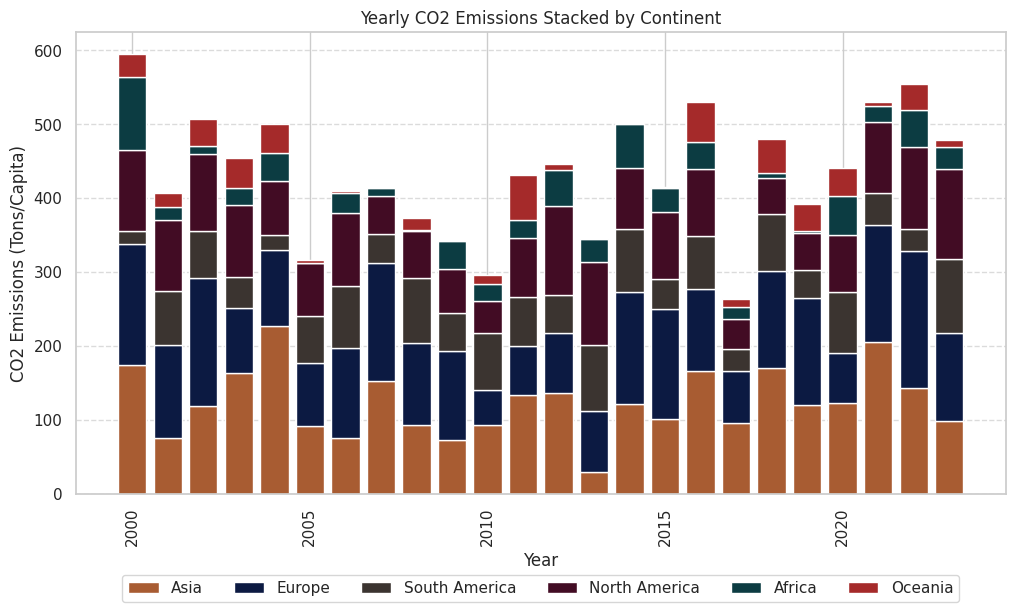

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create a list of unique continents and colors
continents = df['Continent'].unique()
colors = ['#a85c32', '#0c1a42', '#3b3430', '#420c24', '#0c3c42', 'brown']


# Get all unique years
years = sorted(df['Year'].unique())

# Initialize bottom as a Pandas Series to handle missing years
bottom = pd.Series(0, index=years)

plt.figure(figsize=(12, 6))

# Loop through each continent and plot stacked bars
for idx, continent in enumerate(continents):
    # Filter the data for each continent
    subset = df[df['Continent'] == continent]

    # Aggregate CO2 emissions per year
    co2_values = subset.groupby('Year')['CO2 Emissions (Tons/Capita)'].sum()

    # Align with full range of years (to handle missing years)
    co2_values = co2_values.reindex(years, fill_value=0)

    # Plot stacked bar
    plt.bar(years, co2_values, label=continent, bottom=bottom, color=colors[idx])

    # Update bottom for stacking
    bottom += co2_values

# Labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tons/Capita)')
plt.title('Yearly CO2 Emissions Stacked by Continent')

# Display legend at the bottom
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=6)

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Show grid for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [227]:
# Sample data (replace with your actual dataset)
cols_ = ['CO2 Emissions (Tons/Capita)', 'Avg Temperature (°C)', 'Rainfall (mm)_per_100',
         'Pop_Density(per_100m)', 'Renewable Energy (%)', 'Extreme Weather Events',
         'Forest Area (%)', 'Sea Level Rise (mm)']

# Define color mapping for continents
colors = ['#a85c32', '#0c1a42', '#3b3430', '#420c24', '#0c3c42', 'brown']
continent_colors = {continent: colors[i % len(colors)] for i, continent in enumerate(df['Continent'].unique())}

# Create the Dash app
app = dash.Dash(__name__)

# Set up the layout
app.layout = html.Div([
    # Dropdown for selecting the feature to plot
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': col, 'value': col} for col in cols_],
        value='CO2 Emissions (Tons/Capita)',  # Default value
        style={'width': '50%'}
    ),
    # Graph for displaying the stacked bar chart
    dcc.Graph(id='bar-chart')
])

# Callback to update the graph based on selected feature
@app.callback(
    dash.dependencies.Output('bar-chart', 'figure'),
    [dash.dependencies.Input('feature-dropdown', 'value')]
)
def update_graph(selected_feature):
    # Ensure the selected feature exists in the dataframe
    if selected_feature not in df.columns:
        return go.Figure()

    # Group the data by Year and Continent and calculate the mean for the selected feature
    grouped_data = df.groupby(['Year', 'Continent'])[selected_feature].mean().reset_index()

    # Create a bar plot for the selected feature with stacked bars by continent
    fig = go.Figure()

    # Loop through each continent and add a trace (stacked bar) for each one
    for continent in df['Continent'].unique():
        continent_data = grouped_data[grouped_data['Continent'] == continent]
        fig.add_trace(go.Bar(
            x=continent_data['Year'],
            y=continent_data[selected_feature],
            name=continent,
            text=continent_data[selected_feature],
            hoverinfo='text',  # Display value on hover
            marker_color=continent_colors[continent]  # Assign color
        ))

    # Update layout to format the graph
    fig.update_layout(
        title=f'Yearly {selected_feature} by Continent',
        barmode='stack',  # Stack bars by continent
        xaxis_title='Year',
        yaxis_title=selected_feature,
        xaxis=dict(tickmode='linear'),
        plot_bgcolor='white'
    )

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
#


##### 4

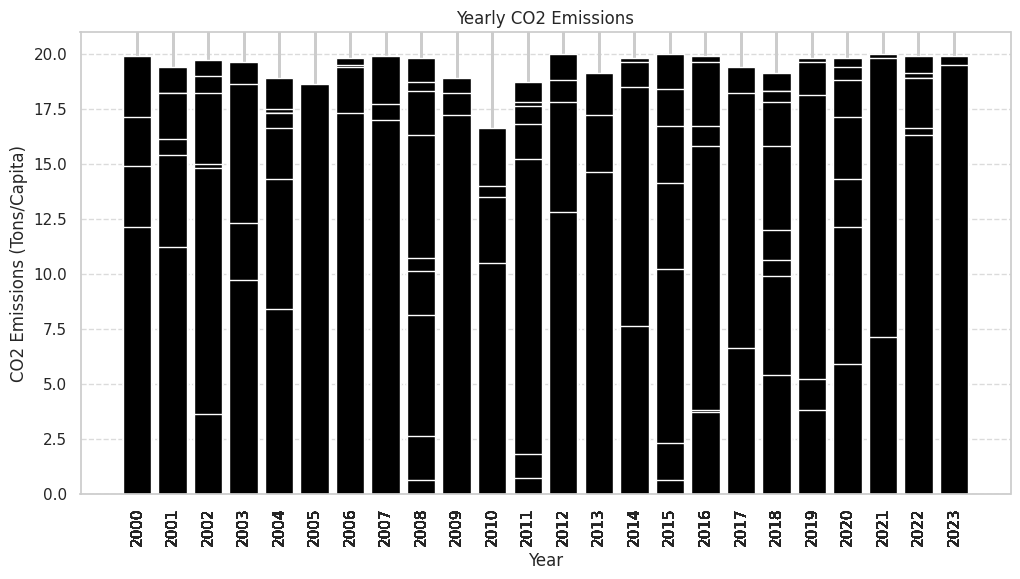

In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(df['Year'], df['CO2 Emissions (Tons/Capita)'], color='black')

# Formatting
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Tons/Capita)')
plt.title('Yearly CO2 Emissions')

# Ensure all years are displayed on the x-axis
plt.xticks(ticks=df['Year'], labels=df['Year'], rotation=90)

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Adds a grid for readability
plt.show()


In [120]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)', 'Date_Year', 'Rainfall (mm)_per_100',
       'Pop_Density(per_100m)', 'ISO Country Code', 'Continent'],
      dtype='object')

In [121]:
cols_

['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']

In [135]:
def update_plot(selected_feature):
    # plt.figure(figsize=(12, 6))
    plt.bar(df['Year'], df[selected_feature], color='black')

    # Formatting
    plt.xlabel('Year')
    plt.ylabel(selected_feature)
    plt.title(f'Yearly {selected_feature}')

    plt.xticks(ticks=df['Year'], labels=df['Year'], rotation=90)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Create a widget for selecting the feature
feature_selector = widgets.Dropdown(
    options=cols_,
    value=cols_[0],  # Default value
    description='Feature:',
    disabled=False
)

#Using the widget is soooooo slow. Dash is better
widgets.interactive(update_plot, selected_feature=feature_selector)




interactive(children=(Dropdown(description='Feature:', options=('CO2 Emissions (Tons/Capita)', 'Avg Temperatur…

##### 5. One thiing about dash is that one code output can span across other dash outputs

In [197]:
cols_

['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']

In [ ]:
df_plot = df.sort_values(by='Year', ascending=True)

In [238]:
# fig = px.scatter(df_plot, x= 'Avg Temperature (°C)', y = 'CO2 Emissions (Tons/Capita)', color='Continent', hover_name='Continent',
#                  hover_data = 'Country' ,
#                  animation_frame='Year',
#                  title = 'Avg Temperature (°C) vs CO2 Emissions (Tons/Capita) per Continent')

# fig.show()

In [237]:

df_plot = df.sort_values(by='Year', ascending=True)

# Compute correlation per continent per year
correlation_per_continent = df_plot.groupby(['Year', 'Continent']).apply(
    lambda x: x[['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)']].corr().iloc[0, 1] if len(x) > 1 else None
).reset_index(name='Correlation')

# Merge correlation data back into df_plot
df_plot = df_plot.merge(correlation_per_continent, on=['Year', 'Continent'], how='left')

# Assign correlation text only to the first occurrence per continent per year
df_plot['Correlation_Text'] = None
for (year, continent), group in df_plot.groupby(['Year', 'Continent']):
    first_index = group.index[0]  # Get first row index for that continent & year
    df_plot.loc[first_index, 'Correlation_Text'] = (
        f"r = {group['Correlation'].iloc[0]:.2f}" if pd.notnull(group['Correlation'].iloc[0]) else "Not enough data"
    )

# Create the animated scatter plot
fig = px.scatter(
    df_plot,
    x='Avg Temperature (°C)',
    y='CO2 Emissions (Tons/Capita)',
    color='Continent',
    hover_name='Continent',
    hover_data=['Country'],
    animation_frame='Year',
    text='Correlation_Text',  # Show correlation per continent
    title='Avg Temperature (°C) vs CO2 Emissions (Tons/Capita) per Continent'
)

fig.update_traces(textposition='top center')  # Position correlation text

fig.show()


<ipython-input-237-531b6d8d5d06>:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [239]:
# fig = px.scatter(
#     df_plot,
#     x='Avg Temperature (°C)',
#     y='CO2 Emissions (Tons/Capita)',
#     trendline='ols',  # Add regression line
#     animation_frame='Year',
#     title = 'Avg Temperature (°C) vs CO2 Emissions '
# )

# fig.show()


In [236]:
df_plot = df.sort_values(by='Year', ascending=True)

correlation_per_year = df_plot.groupby('Year').apply(
    lambda x: x[['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)']].corr().iloc[0, 1]
).reset_index(name='Correlation')

# Assign correlation text only to the first occurrence per year
df_plot['Correlation'] = None
for year in df_plot['Year'].unique():
    first_index = df_plot[df_plot['Year'] == year].index[-1]  # Get first row index for that year
    df_plot.loc[first_index, 'Correlation'] = (
        f"r = {correlation_values[year]:.2f}" if correlation_values[year] is not None else "Not enough data"
    )

# Create the animated scatter plot
fig = px.scatter(
    df_plot,
    x='Avg Temperature (°C)',
    y='CO2 Emissions (Tons/Capita)',
    trendline='ols',  # Add regression line
    animation_frame='Year',
    text='Correlation',  # Show correlation per year
    title='Avg Temperature (°C) vs CO2 Emissions'
)

fig.update_traces(textposition='top center')  # Position correlation text

fig.show()


<ipython-input-236-849e30a85d5c>:4: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



##### **Interactive Dashboard 1**: Static, we move throough the years ourselves

In [245]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
import numpy as np

# Initialize Dash app
app2 = dash.Dash(__name__)

# Define available columns for dropdown selection
cols_ = [{'label': col, 'value': col} for col in df.columns if col not in ['Year', 'Country', 'Continent']]

# Layout
app2.layout = html.Div([
    html.H1("Interactive CO2 Emissions Dashboard"),

    html.Label("Select X-axis Variable:"),
    dcc.Dropdown(id='x-axis', options=cols_, value='Avg Temperature (°C)'),

    html.Label("Select Y-axis Variable:"),
    dcc.Dropdown(id='y-axis', options=cols_, value='CO2 Emissions (Tons/Capita)'),

    dcc.Graph(id='scatter-plot'),

    dcc.Slider(
        id='year-slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].min(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    )
])

# Callback to update graph
@app2.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value'),
     Input('year-slider', 'value')]
)
def update_graph(x_col, y_col, selected_year):
    filtered_df = df[df['Year'] == selected_year]

    # Compute correlation per continent
    correlation_per_continent = filtered_df.groupby('Continent').apply(
        lambda x: x[[x_col, y_col]].corr().iloc[0, 1] if len(x) > 1 else None
    ).reset_index(name='Correlation')

    # Merge correlation data back into the dataframe
    filtered_df = filtered_df.merge(correlation_per_continent, on='Continent', how='left')

    # Assign correlation text only to the first occurrence per continent
    filtered_df['Correlation_Text'] = None
    for continent, group in filtered_df.groupby('Continent'):
        first_index = group.index[0]  # Get first row index for that continent
        filtered_df.loc[first_index, 'Correlation_Text'] = (
            f"r = {group['Correlation'].iloc[0]:.2f}" if pd.notnull(group['Correlation'].iloc[0]) else "Not enough data"
        )

    # Create scatter plot
    fig = px.scatter(
        filtered_df, x=x_col, y=y_col, color='Continent', hover_name='Continent',
        hover_data=['Country'], text='Correlation_Text',
        title=f'{y_col} vs {x_col} for {selected_year}'
    )

    fig.update_traces(textposition='top center')  # Position correlation text

    return fig

# Run app
# if __name__ == '__main__':
#     app2.run_server(debug=True)
app2.run_server(debug=True)


<IPython.core.display.Javascript object>

##### Interactive Dashboard 2: This one is a time loop that steady plays your points

In [244]:


# Initialize Dash app
app1 = dash.Dash(__name__)



# Layout
app1.layout = html.Div([
    html.H1("Interactive CO2 Emissions Dashboard"),

    html.Label("Select X-axis Variable:"),
    dcc.Dropdown(
        id='x-axis',
        options=cols_,
        value='Avg Temperature (°C)'
    ),

    html.Label("Select Y-axis Variable:"),
    dcc.Dropdown(
        id='y-axis',
        options=cols_,
        value='CO2 Emissions (Tons/Capita)'
    ),

    dcc.Graph(id='scatter-plot'),

    html.Label("Select Year:"),
    dcc.Slider(
        id='year-slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].min(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    ),

    dcc.Interval(
        id='interval-component',
        interval=1000,  # Update every 1000 milliseconds (1 second)
        n_intervals=0
    )
])

# Callback to update graph based on year, x and y axis
@app1.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value'),
     Input('year-slider', 'value'),
     Input('interval-component', 'n_intervals')]
)
def update_graph(x_col, y_col, selected_year, n_intervals):
    # Automatically update year for animation
    if n_intervals % len(df['Year'].unique()) == 0:
        selected_year = df['Year'].min()
    else:
        selected_year = df['Year'].unique()[n_intervals % len(df['Year'].unique())]

    filtered_df = df[df['Year'] == selected_year]

    fig = px.scatter(
        filtered_df, x=x_col, y=y_col, color='Continent', hover_name='Continent',
        hover_data=['Country'],
        title=f'{y_col} vs {x_col} for {selected_year}'
    )
    return fig

# Run app
# if __name__ == '__main__':
#     app1.run_server(debug=True)


app1.run_server(debug=True)


<IPython.core.display.Javascript object>

#### **Multivariate Analysis**

1. Sort out the 5 highest countries based, and do a regression plot for those factors one by one . Imagine an interactive dashboard where you just select the country. or create a function instead for filtering and plotting.
e.g co2 emission trend

    df,groupby(['country' , 'year'])[[CO2, abg_temp]].mean().unstack()

    we can then plot 3 features for each of these countires on the same ax object


2. Use a heatmap to depict the correlation that other numerical variables have on each other (per regional data. so a correlation table on how each variable interact or affect one another by region )

##### 1. Sort out the countries and plot

In [ ]:
cols_

['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']

In [ ]:
normality_results = []

# Group data by 'Year' and 'Continent' and calculate the mean for each feature
country_data = df.groupby(['Year', 'Country'])[cols_].mean().reset_index()

# Loop through each column (feature)
for col in cols_:
    # Loop through each continent
    for year in df['Year'].unique():
        # Get the data for the specific continent and feature
        data = country_data[country_data['Year'] == year][col].dropna()

        # Perform the Shapiro-Wilk test for normality
        stat, p_value = stats.shapiro(data)

        # Determine if the data is normal based on the p-value
        normality_result = 'Normal' if p_value > 0.05 else 'Not Normal'

        # Append the result to the list
        normality_results.append({
            'Feature': col,
            'Continent': year,
            'Shapiro-Wilk p-value': p_value,
            'Normality Test Result': normality_result
        })

# Convert the results into a DataFrame
normality_results_df = pd.DataFrame(normality_results)

In [ ]:
normality_results_df.groupby('Feature')['Normality Test Result'].value_counts()

Feature                      Normality Test Result
Avg Temperature (°C)         Normal                   22
                             Not Normal                2
CO2 Emissions (Tons/Capita)  Normal                   23
                             Not Normal                1
Extreme Weather Events       Normal                   22
                             Not Normal                2
Forest Area (%)              Normal                   23
                             Not Normal                1
Pop_Density(per_100m)        Normal                   23
                             Not Normal                1
Rainfall (mm)_per_100        Normal                   24
Renewable Energy (%)         Normal                   22
                             Not Normal                2
Sea Level Rise (mm)          Normal                   22
                             Not Normal                2
Name: count, dtype: int64

**Data Per Year is also Quite Normal**: So go ahead

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

def compare_feature_trend(data, selected_feature):
    """
    Filters the top 5 countries based on a selected feature and plots
    only that feature over time for those countries.

    Parameters:
    data (DataFrame): DataFrame containing the data.
    selected_feature (str): The column to base the top 5 countries on.
    """
    # Calculate the mean value per country for the selected feature
    top_5_countries = (
        data.groupby('Country')[selected_feature].mean()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist()
    )

    # Filter the dataset to include only the top 5 countries
    filtered_data = data[data['Country'].isin(top_5_countries)]

    # Plotting
    plt.figure(figsize=(12, 6))

    for country in top_5_countries:
        country_data = filtered_data[filtered_data['Country'] == country]

        sns.lineplot(
            data=country_data,
            x='Year',
            y=selected_feature,
            label=f'{country}',
            errorbar=None  # Removes the shaded background
        )

    plt.title(f'Trend of {selected_feature} for Top 5 Countries')
    plt.xlabel('Year')
    plt.ylabel(selected_feature)
    plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Sample column names
cols_ = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)',
        'Rainfall (mm)_per_100', 'Pop_Density(per_100m)', 'Renewable Energy (%)', 'Extreme Weather Events',
        'Forest Area (%)']

# Widget for selecting the feature to filter and plot
feature_selector = widgets.Dropdown(
    options=cols_,
    value='Avg Temperature (°C)',
    description='Feature:',
)

# Interactive widget to update the plot based on user selection
display(widgets.interactive(compare_feature_trend,
                            data=widgets.fixed(df),
                            selected_feature=feature_selector))


interactive(children=(Dropdown(description='Feature:', options=('Avg Temperature (°C)', 'CO2 Emissions (Tons/C…

Dropdown(description='Filter By:', index=2, options=('Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'S…

Button(description='Filter Top 5', style=ButtonStyle())

Dropdown(description='Plot Feature:', index=6, options=('Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)',…

Button(description='Plot Feature for Top 5', style=ButtonStyle())

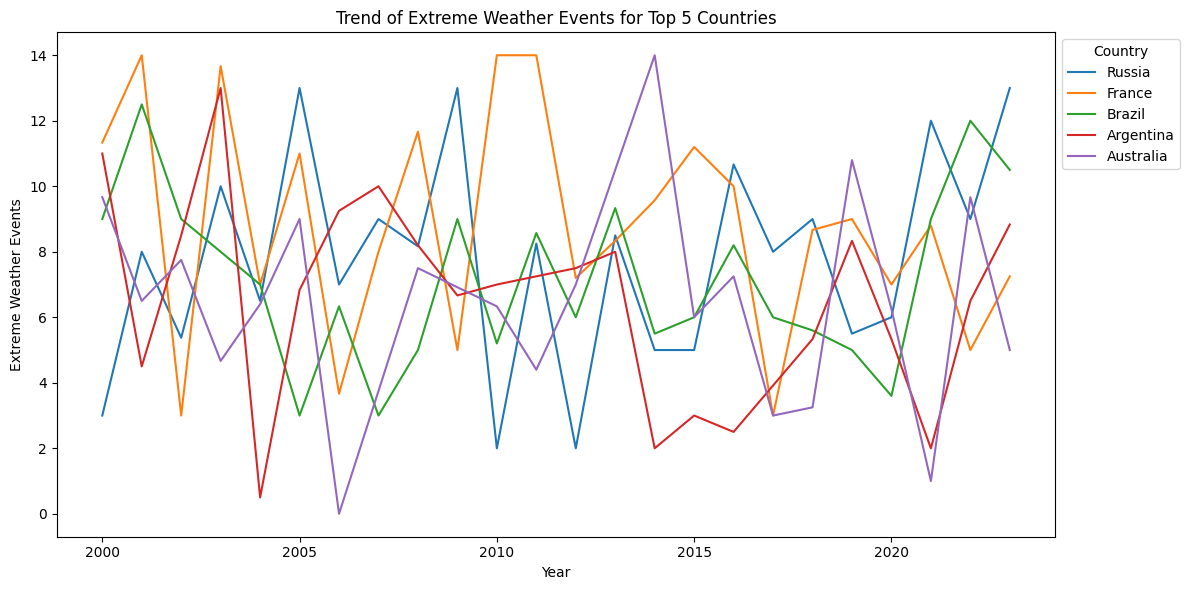

In [ ]:
# Global variable to store the top 5 countries
top_5_countries = []

# List of required columns
required_columns = [
    'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)',
    'Rainfall (mm)_per_100', 'Pop_Density(per_100m)', 'Renewable Energy (%)',
    'Extreme Weather Events', 'Forest Area (%)'
]

def filter_top_countries(selected_feature):
    """
    Filters the top 5 countries based on the selected feature.
    Stores them in a global variable.
    """
    global top_5_countries
    top_5_countries = (
        df.groupby('Country')[selected_feature].mean()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist()
    )
    print(f"Top 5 Countries Based on {selected_feature}: {top_5_countries}")

def plot_feature(selected_feature):
    """
    Clears the previous plot and plots a selected feature over time for the top 5 countries.
    """
    global top_5_countries
    if not top_5_countries:
        print("Please filter the top 5 countries first.")
        return

    filtered_data = df[df['Country'].isin(top_5_countries)]

    # Clear previous output before plotting
    clear_output(wait=True)

    # Re-display the widgets to keep them visible after clearing output
    display(feature_selector_filter, filter_button, feature_selector_plot, plot_button)

    plt.figure(figsize=(12, 6))

    for country in top_5_countries:
        country_data = filtered_data[filtered_data['Country'] == country]
        sns.lineplot(
            data=country_data,
            x='Year',
            y=selected_feature,
            label=f'{country}',
            errorbar=None  # Removes shaded background
        )

    plt.title(f'Trend of {selected_feature} for Top 5 Countries')
    plt.xlabel('Year')
    plt.ylabel(selected_feature)
    plt.legend(title='Country', loc='upper left', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# Dropdown for selecting the feature to filter the top 5 countries
feature_selector_filter = widgets.Dropdown(
    options=required_columns,
    value='Avg Temperature (°C)',
    description='Filter By:',
)

# Button to filter the top 5 countries
filter_button = widgets.Button(description="Filter Top 5")
filter_button.on_click(lambda x: filter_top_countries(feature_selector_filter.value))

# Dropdown for selecting the feature to plot
feature_selector_plot = widgets.Dropdown(
    options=required_columns,
    value='Avg Temperature (°C)',
    description='Plot Feature:',
)

# Button to plot the selected feature for stored top 5 countries
plot_button = widgets.Button(description="Plot Feature for Top 5")
plot_button.on_click(lambda x: plot_feature(feature_selector_plot.value))

# Display widgets
display(feature_selector_filter, filter_button, feature_selector_plot, plot_button)


In [ ]:
cols_

['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']

##### 2

In [250]:

cols_ =['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']
# Group by continent
correlation_by_continent = {}

for continent, group in df.groupby('Continent'):
    # Calculate the correlation matrix for the specified columns for each continent
    corr_matrix = group[cols_].corr()

    # Store the correlation matrix in the dictionary for that continent
    correlation_by_continent[continent] = corr_matrix

# Now let's build a table that contains correlations for each pair of columns, by continent
# We'll convert the correlation matrices into a DataFrame with multi-index: (continent, column pairs)
result = []

for continent, corr_matrix in correlation_by_continent.items():
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            result.append({
                'Continent': continent,
                'Column 1': col1,
                'Column 2': col2,
                'Correlation': corr_matrix.loc[col1, col2]
            })

# Convert the list into a DataFrame
corr_table = pd.DataFrame(result)

# Show the final table
corr_table.head(2)


,Continent,Column 1,Column 2,Correlation
0,Africa,Avg Temperature (°C),Avg Temperature (°C),1.000000
1,Africa,Avg Temperature (°C),CO2 Emissions (Tons/Capita),0.143377


In [251]:
filtered_corr_table = corr_table[corr_table['Column 1'] != corr_table['Column 2']]
filtered_corr_table

,Continent,Column 1,Column 2,Correlation
1,Africa,Avg Temperature (°C),CO2 Emissions (Tons/Capita),0.143377
2,Africa,Avg Temperature (°C),Sea Level Rise (mm),0.092414
3,Africa,Avg Temperature (°C),Rainfall (mm)_per_100,0.061262
4,Africa,Avg Temperature (°C),Pop_Density(per_100m),0.026273
5,Africa,Avg Temperature (°C),Renewable Energy (%),-0.148523
...,...,...,...,...
378,South America,Forest Area (%),Sea Level Rise (mm),0.010277
379,South America,Forest Area (%),Rainfall (mm)_per_100,-0.028584
380,South America,Forest Area (%),Pop_Density(per_100m),0.003380
381,South America,Forest Area (%),Renewable Energy (%),0.132657


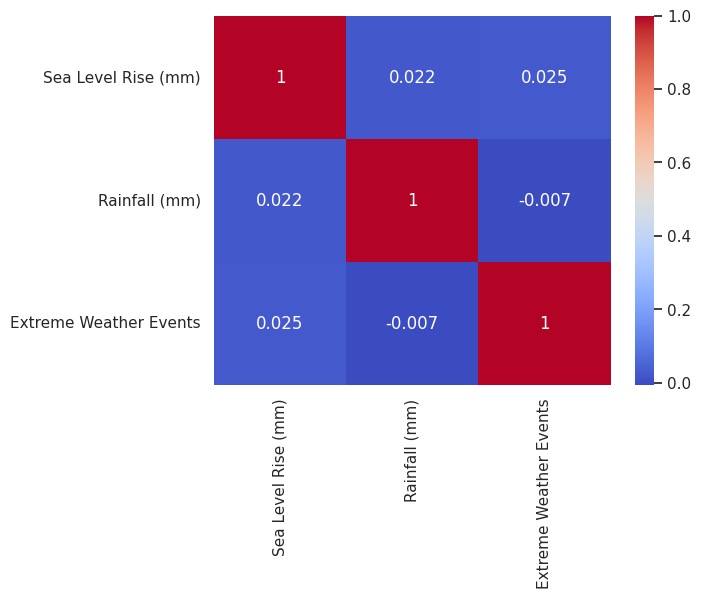

In [274]:
corr_matrix = df[['Sea Level Rise (mm)', 'Rainfall (mm)', 'Extreme Weather Events']].corr()
sns.heatmap(corr_matrix, cmap = 'coolwarm', annot=True)
plt.show()

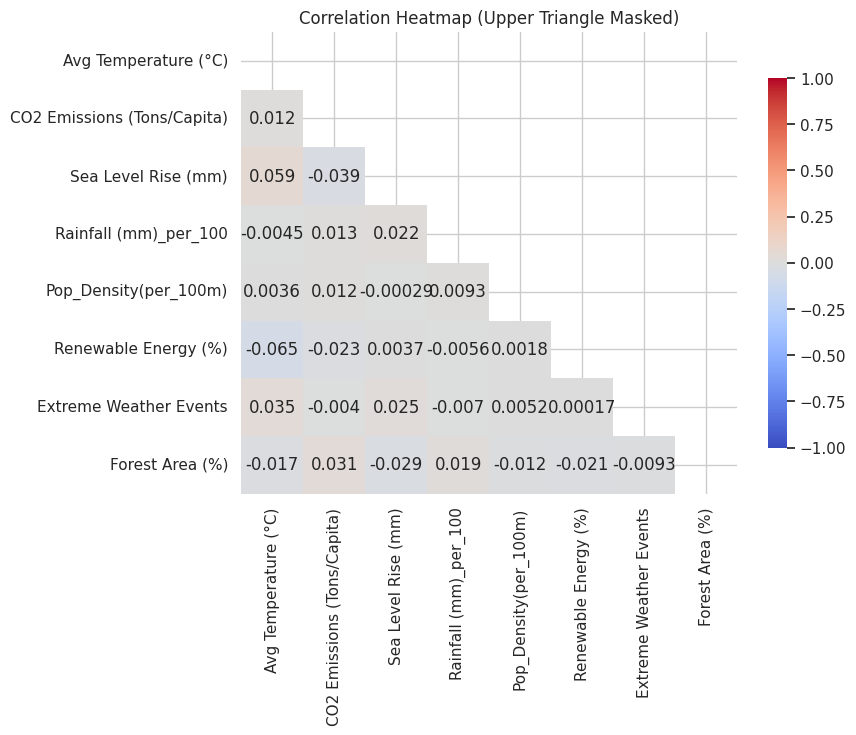

In [255]:
# Calculate the correlation matrix
f_corr = df[cols_].corr()

# Mask the upper triangle
mask = np.triu(np.ones_like(f_corr, dtype=bool))

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(f_corr, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})

# Add a title
plt.title('Correlation Heatmap (Upper Triangle Masked)')

# Show the plot
plt.show()

In [257]:
# Function to plot the correlation heatmap based on the selected continent
def plot_corr_heatmap(continent):
    # Filter df by selected continent
    df_filtered = df[df['Continent'] == continent]

    # Select numeric columns for correlation
    df_numeric = df_filtered[cols_]

    # Calculate the correlation matrix
    f_corr = df_numeric.corr()

    # Mask the upper triangle
    mask = np.triu(np.ones_like(f_corr, dtype=bool))

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(f_corr, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'shrink': 0.8})

    # Add a title
    plt.title(f'Correlation Heatmap for {continent} (Upper Triangle Masked)')

    # Show the plot
    plt.show()

# Dropdown widget for continent selection
continent_selector = widgets.Dropdown(
    options=df['Continent'].unique(),  # List of unique continents from the df
    description='Continent:',
    disabled=False
)

# Create an interactive plot
interactive_plot = interactive(plot_corr_heatmap, continent=continent_selector)

# Display the widget and the plot
interactive_plot


interactive(children=(Dropdown(description='Continent:', options=('Asia', 'Europe', 'South America', 'North Am…

Once we group by

### **ANOVA**

A.  Do this for the qualities across region groups to back any claim that certain regions have it worse than the others.

Approach:
1. Group by Continent: Your independent variable (the factor you're comparing) will be Continent, which will have 7 different groups.
2. Aggregate by Year: You can calculate the mean values for temperature and CO2 over the years for each continent, or use the raw data if you want to compare them year by year.
3. ANOVA: You use one-way ANOVA because you're comparing the means of one variable (temperature or CO2) across multiple groups (the continents).

Check Assumptions:

- Independence: Make sure your data points are independent.
- Normality: Each group (continent) should have a roughly normal distribution of values for temperature and CO2.
- Homogeneity of Variance: The variance in each group should be roughly the same.



In [ ]:
import pandas as pd

import scipy.stats as stats

In [ ]:
# Plot a gloab graph to check for normality
# that is for each region, we will plot the trend of co2, and other continous data in different columns for each year on the same plot per variable, we should have like 20 unique years


In [59]:
# Function to check normality using Shapiro-Wilk test and plot histogram
def check_normality(data):
    stat, p_value = stats.shapiro(data)
    if p_value > 0.05:
        print("Data is normally distributed (p-value: {:.3f})".format(p_value))
    else:
        print("Data is not normally distributed (p-value: {:.3f})".format(p_value))

    # # Plot histogram for visualization
    # plt.figure(figsize=(8, 5))
    # sns.histplot(data, kde=True)
    # plt.title("Histogram of Data")
    # plt.show()

# Function to check homoscedasticity using Levene's Test
def check_homoscedasticity(*groups):
    stat, p_value = stats.levene(*groups)
    if p_value > 0.05:
        print("Homoscedasticity assumption holds (p-value: {:.3f})".format(p_value))
    else:
        print("Homoscedasticity assumption is violated (p-value: {:.3f})".format(p_value))


In [64]:
df['Continent'].unique()

array(['Asia', 'Europe', 'South America', 'North America', 'Africa',
       'Oceania'], dtype=object)

In [67]:
test = df[cols_]

test.head(2)

,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm)_per_100,Pop_Density(per_100m),Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,12.0,16.9,2.8,25.20,5.09,21.0,3,59.9
1,32.4,12.0,1.5,18.32,5.55,6.0,2,50.9


In [61]:
cols_

['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']

In [ ]:
anova_results = anova_analysis(actual_df)
anova_results

In [76]:
import pandas as pd
import scipy.stats as stats

def anova_analysis(grouped_data, to_filter=False, check=False):
    # List of variables to analyze
    global cols_

    # Reset index to make 'Continent' and 'Year' columns accessible
    grouped_data = grouped_data.reset_index()

    if to_filter:  # In case when you use continent and year.
        grouped_data = grouped_data.drop(grouped_data.columns[0], axis=1)

    anova_results = []
    # Loop over each variable (temperature and CO2)
    for i in cols_:
        print(f"Checking for {i} normality and homoscedasticity:")

        normality_met = True
        homoscedasticity_met = True

        # Check normality for each group (continent)
        if check:  # Only check normality if `check` is True
            for continent in grouped_data['Continent'].unique():
                data = grouped_data[grouped_data['Continent'] == continent][i]
                print(f" - {continent}:")
                # If normality is violated for any continent, set normality_met to False
                try:
                    check_normality(data)
                except:
                    normality_met = False
                    print(f"    Normality violated for {continent}")

        # Check homoscedasticity (Levene's test) for all continents
        print("\nChecking homoscedasticity for all continents:")
        groups = [grouped_data[grouped_data['Continent'] == continent][i] for continent in grouped_data['Continent'].unique()]
        try:
            check_homoscedasticity(*groups)
        except:
            homoscedasticity_met = False
            print(f"    Homoscedasticity assumption violated")

        print("\n" + "-"*50)

        # If assumptions are met, use One-Way ANOVA (f_oneway), else use Kruskal-Wallis (kruskal)
        x = stats.f_oneway if normality_met and homoscedasticity_met else stats.kruskal
        f_val, p_val = x(
            grouped_data[grouped_data['Continent'] == 'Africa'][i],
            grouped_data[grouped_data['Continent'] == 'Asia'][i],
            grouped_data[grouped_data['Continent'] == 'Europe'][i],
            grouped_data[grouped_data['Continent'] == 'North America'][i],
            grouped_data[grouped_data['Continent'] == 'South America'][i],
            grouped_data[grouped_data['Continent'] == 'Oceania'][i]
        )
        anova_results.append({'var': i, 'F-value': f_val, 'p-value': p_val})

    # Print the results
    print("-" * 50)
    anova_df = pd.DataFrame(anova_results)

    # Add a column indicating whether the result is significant (p < 0.05)
    anova_df['Significant'] = anova_df['p-value'] < 0.05

    return anova_df


# Calculate mean temperature and CO2 per continent over the years
grouped_data = df.groupby(['Continent', 'Year'])[cols_].mean().reset_index()

# Run the ANOVA analysis
anova_results = anova_analysis(grouped_data, check= False)  # Set check=False to skip normality checking
print(anova_results)


Checking for Avg Temperature (°C) normality and homoscedasticity:

Checking homoscedasticity for all continents:
Homoscedasticity assumption is violated (p-value: 0.003)

--------------------------------------------------
Checking for CO2 Emissions (Tons/Capita) normality and homoscedasticity:

Checking homoscedasticity for all continents:
Homoscedasticity assumption is violated (p-value: 0.000)

--------------------------------------------------
Checking for Sea Level Rise (mm) normality and homoscedasticity:

Checking homoscedasticity for all continents:
Homoscedasticity assumption is violated (p-value: 0.000)

--------------------------------------------------
Checking for Rainfall (mm)_per_100 normality and homoscedasticity:

Checking homoscedasticity for all continents:
Homoscedasticity assumption is violated (p-value: 0.000)

--------------------------------------------------
Checking for Pop_Density(per_100m) normality and homoscedasticity:

Checking homoscedasticity for all con

Yes, exactly! When the p-value is greater than 0.05, it means there is no statistically significant difference between the continents for that variable. In other words, based on the analysis, we can't confidently say that one continent (e.g., the Americas) is higher or lower than another continent (e.g., Africa) for the specific variable in question (e.g., Avg Temperature, Sea Level Rise, Rainfall, etc.).

Check the ranking of continents by categories that have shown to be significantly different.

In [85]:
gp = grouped_data.groupby('Continent').mean().reset_index()
gp.head(2)

,Continent,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm)_per_100,Pop_Density(per_100m),Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,Africa,2011.782609,20.498375,9.008944,2.843033,16.793373,7.228697,23.820983,6.906211,43.855186
1,Asia,2011.500000,19.854392,10.819486,2.920963,17.447182,6.748209,27.852744,7.589648,40.127807


In [87]:
# Sorting the continents by mean CO2 emissions in descending order to find the highest CO2
mean_co2_by_continent = gp.sort_values(by='CO2 Emissions (Tons/Capita)', ascending=False)

# Display the ranked continents
mean_co2_by_continent[['Continent']]

,Continent
5,South America
1,Asia
2,Europe
3,North America
0,Africa
4,Oceania


In [88]:
mean_co2_by_continent = df.groupby('Continent')['CO2 Emissions (Tons/Capita)'].mean()

# Sorting the continents by mean CO2 emissions in descending order
mean_co2_by_continent = mean_co2_by_continent.sort_values(ascending=False)

# Display the top 6 continents ranked by CO2 emissions
top_6_continents = mean_co2_by_continent.head(6)

# Print the result
print(top_6_continents)

Continent
Asia             10.878909
South America    10.643284
Europe           10.572932
North America    10.185128
Africa            9.617808
Oceania           8.900000
Name: CO2 Emissions (Tons/Capita), dtype: float64


In [90]:
top_6_continents.index

Index(['Asia', 'South America', 'Europe', 'North America', 'Africa',
       'Oceania'],
      dtype='object', name='Continent')

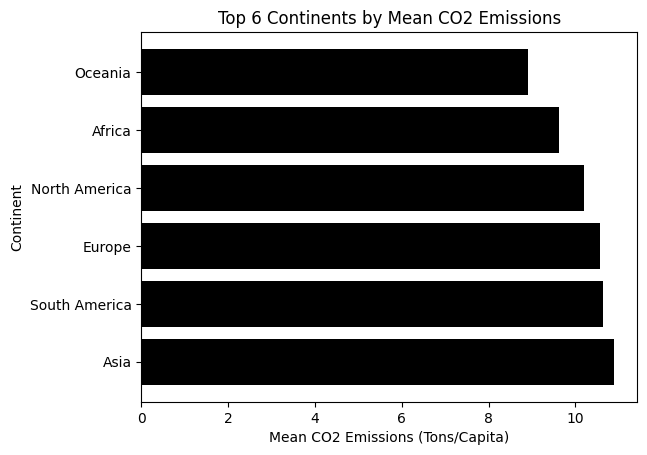

In [105]:
plt.barh(top_6_continents.index, top_6_continents.values, color='black')  # Fix here
plt.xlabel('Mean CO2 Emissions (Tons/Capita)')
plt.ylabel('Continent')
plt.title('Top 6 Continents by Mean CO2 Emissions')
plt.show()


In [107]:

# Create a doughnut chart (pie chart with hole in the center)
fig = px.pie(
    top_6_continents,
    names=top_6_continents.index,
    values=top_6_continents.values,
    title="Proportional CO2 Emissions by Continent",
    hole=0.3,  # This creates the doughnut effect
    labels={'names': 'Continent', 'values': 'CO2 Emissions (Tons/Capita)'}  # Labels
)

# Update layout to add lines pointing from the circle to the legend
fig.update_traces(textinfo='percent+label', pull=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1])  # Display percentage and label
fig.update_layout(
    showlegend=True,
    legend=dict(
        orientation="v",
        x=1,  # Position the legend
        xanchor="left",
        y=1,
        yanchor="top"
    )
)

# Show the figure
fig.show()


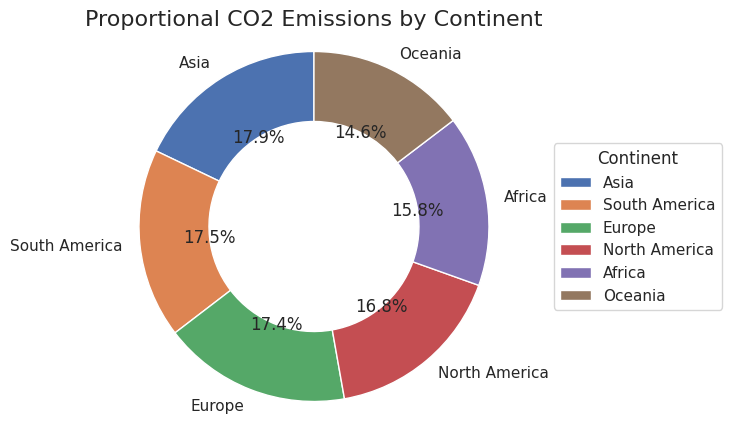

In [112]:

labels = top_6_continents.index
sizes = top_6_continents.values

# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure
fig, ax = plt.subplots(figsize=(6, 5))

# Create the doughnut chart (pie chart with hole)
wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,
                                  wedgeprops={'width': 0.4, 'edgecolor': 'white'})

# Add a circle at the center to make it a doughnut chart
centre_circle = plt.Circle((0,0), 0.2, color='white', fc='white', linewidth=0)
ax.add_artist(centre_circle)

# Title
ax.set_title("Proportional CO2 Emissions by Continent", fontsize=16)

# Add annotations (lines pointing to the legend)
ax.legend(wedges, labels, title="Continent", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### **Geographic Mapping**
1. Distribution by Region
2. Distribution by Variables
3. Global Risk and Ranking (up till 2023)

In [ ]:
# Global trend of co2

In [ ]:
df = pd.read_csv('/content/climate_change_dataset.csv')

In [ ]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)'],
      dtype='object')

In [ ]:
df['Country'].unique()

array(['UK', 'USA', 'France', 'Argentina', 'Germany', 'China',
       'South Africa', 'Australia', 'Indonesia', 'Brazil', 'India',
       'Russia', 'Canada', 'Mexico', 'Japan'], dtype=object)

In [ ]:
country_iso_mapping = {
    'UK': 'GBR',
    'USA': 'USA',
    'France': 'FRA',
    'Argentina': 'ARG',
    'Germany': 'DEU',
    'China': 'CHN',
    'South Africa': 'ZAF',
    'Australia': 'AUS',
    'Indonesia': 'IDN',
    'Brazil': 'BRA',
    'India': 'IND',
    'Russia': 'RUS',
    'Canada': 'CAN',
    'Mexico': 'MEX',
    'Japan': 'JPN'
}

# Apply this mapping to your dataframe's 'Country' column
df['ISO Country Code'] = df['Country'].map(country_iso_mapping)

In [18]:
def choose(selected_feature):
  color_scale = ''
  # Define color scale based on the selected feature
  if selected_feature == 'Forest Area (%)':
      color_scale += 'greens'
  elif selected_feature in ['Rainfall (mm)', 'Sea Level Rise (mm)']:
      color_scale += 'Blues'
  else:
      color_scale += 'reds'
  return color_scale

**Plot per Region for CO2. The only column to fit the Anova difference**

In [94]:
gp2 = grouped_data.groupby(['Continent', 'Year']).mean().reset_index()

# Now take the mean across all years for each continent
final_gp = gp2.groupby(['Continent', 'Year']).mean().reset_index()
gp2.head(2)

,Continent,Year,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm)_per_100,Pop_Density(per_100m),Renewable Energy (%),Extreme Weather Events,Forest Area (%)
0,Africa,2000,26.114286,13.985714,2.971429,21.898571,5.392857,25.414286,6.142857,32.514286
1,Africa,2001,21.725000,4.500000,2.550000,15.025000,9.215000,32.250000,9.750000,33.750000


In [98]:
df_plot = df.sort_values('Year', ascending=True)

fig = px.choropleth(df_plot, locations='ISO Country Code', color = 'CO2 Emissions (Tons/Capita)' , hover_name='Continent',
                    color_continuous_scale= choose('CO2 Emissions (Tons/Capita)'),
                    animation_frame = 'Year',
                    title=f'Global Distribution of CO2 Emission')

fig.show()

In [21]:
 df.sort_values('Year', ascending=True).head(2)

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),Date_Year,Rainfall (mm)_per_100,Pop_Density(per_100m),ISO Country Code,Continent
999,2000,Australia,8.3,12.1,1.1,2195,353488527,42.4,13,63.2,2000-01-01,21.95,3.53,AUS,Oceania
969,2000,USA,28.0,17.8,3.4,518,161376204,38.0,8,30.2,2000-01-01,5.18,1.61,USA,North America


In [264]:
selected_feature = 'Forest Area (%)'

df_plot = df.sort_values('Year', ascending=True)
fig = px.choropleth(df_plot, locations='ISO Country Code', color= 'Forest Area (%)' , hover_name='Country',
                    color_continuous_scale= choose('Forest Area (%)' ), animation_frame = 'Year',
                    title=f'Climate Change Trend for {selected_feature}')

fig.show()

In [266]:
cols_ = ['Avg Temperature (°C)',
 'CO2 Emissions (Tons/Capita)',
 'Sea Level Rise (mm)',
 'Rainfall (mm)_per_100',
 'Pop_Density(per_100m)',
 'Renewable Energy (%)',
 'Extreme Weather Events',
 'Forest Area (%)']

In [267]:
import plotly.express as px
selected_feature = 'Forest Area (%)'

fig = px.choropleth(df_plot, locations='ISO Country Code', color= 'Forest Area (%)' , hover_name='Country',
                    color_continuous_scale= choose('Forest Area (%)' ), animation_frame = 'Year',
                    title=f'Climate Change Trend')



# Add a dropdown menu to select color features
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': feature,
                'method': 'relayout',
                'args': [
                    {'coloraxis.colorscale': choose(feature)},  # Apply the color scale based on the selected feature
                    {'color': feature}  # Set the color based on the selected feature
                ]
            } for feature in cols_
        ],
        'direction': 'down',
        'showactive': True,
        'active': cols_.index(selected),  # Set initial active state
        'x': 0.1,  # Position of the dropdown button
        'xanchor': 'left',
        'y': 1.15,  # Position of the dropdown button
        'yanchor': 'top',
    }]
)

# Show the figure
fig.show()


In [ ]:
features = ['Forest Area (%)', 'Rainfall (mm)', 'Sea Level Rise (mm)', 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)']
color_scales = {
    'Forest Area (%)': 'greens',
    'Rainfall (mm)': 'Blues',
    'Sea Level Rise (mm)': 'Blues',
    'Avg Temperature (°C)': 'reds',
    'CO2 Emissions (Tons/Capita)': 'reds'
}

import time
from IPython.display import clear_output  # This is to clear previous output in Jupyter notebooks
import random

x = list(df['Year'].unique())

# Infinite loop to change the feature and update the plot
try:
    while True:
        # Randomly pick a feature for each iteration
        selected_feature = random.choice(features)
        selected_year = random.choice(x)
        color_scale = choose(selected_feature)

        # Create the plot

        fig = px.choropleth(df[df['Year'] == selected_year],
                            locations='ISO Country Code',
                            color=selected_feature,
                            hover_name='Country',
                            color_continuous_scale=color_scale,
                            title=f'Global Distribution Comparison for {selected_feature} in {selected_year}')

        clear_output()  # This clears the previous plot

        # Show the plot
        fig.show()

        time.sleep(4)
except KeyboardInterrupt:
    print("Plot stopped by user.")

Plot stopped by user.


In [ ]:


# Initialize the Dash app
app = dash.Dash(__name__)

# Sample plotly map of countries
fig = px.choropleth(df, locations='ISO Country Code', color='Forest Area (%)', hover_name='Country',
                    color_continuous_scale='reds',
                    range_color=[df['Forest Area (%)'].min(), df['Forest Area (%)'].max()])

# Layout for the dashboard
app.layout = html.Div([
    html.H1("Environmental Dashboard"),

    # Dropdown for selecting feature
    dcc.Dropdown(
        id='feature-dropdown',
        options=[
            {'label': 'Average Temperature', 'value': 'Avg Temperature (°C)'},
            {'label': 'CO2 Emissions', 'value': 'CO2 Emissions (Tons/Capita)'},
            {'label': 'Rainfall', 'value': 'Rainfall (mm)'},
            {'label': 'Sea Level Rise', 'value': 'Sea Level Rise (mm)'},
            {'label': 'Forest Area', 'value': 'Forest Area (%)'}
        ],
        value='Forest Area (%)'
    ),

    # Year slider
    dcc.Slider(
        id='year-slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        step=1,
        value=df['Year'].min(),
        marks={year: str(year) for year in range(df['Year'].min(), df['Year'].max()+1, 2)},
    ),

    # Map for displaying countries' data
    dcc.Graph(
        id='world-map',
        figure=fig
    )
])

# Update callback for updating the map
@app.callback(
    dash.dependencies.Output('world-map', 'figure'),
    [dash.dependencies.Input('feature-dropdown', 'value'),
     dash.dependencies.Input('year-slider', 'value')]
)
def update_map(selected_feature, selected_year):
    # Filter data for the selected year
    filtered_df = df[df['Year'] == selected_year]

    # Define color scale based on the selected feature
    if selected_feature == 'Forest Area (%)':
        color_scale = 'greens'
    elif selected_feature in ['Rainfall (mm)', 'Sea Level Rise (mm)']:
        color_scale = 'Blues'
    else:
        color_scale = 'reds'

    # Create the choropleth map based on the selected feature
    fig = px.choropleth(filtered_df, locations='ISO Country Code', color=selected_feature, hover_name='Country',
                        color_continuous_scale=color_scale,
                        range_color=[filtered_df[selected_feature].min(), filtered_df[selected_feature].max()])

    return fig

# Display country data when a country is clicked
@app.callback(
    Output('country-data', 'children'),
    [Input('world-map', 'clickData'),
     Input('feature-dropdown', 'value'),
     Input('year-slider', 'value')]
)
def display_country_data(clickData, selected_feature, selected_year):
    if clickData:
        country_name = clickData['points'][0]['location']
        # Filter the data for the selected country and year
        country_data = df[(df['Country'] == country_name) & (df['Year'] == selected_year)]

        if not country_data.empty:
            country_info = country_data.iloc[0]
            return html.Div([
                html.H3(f"Country: {country_name}"),
                html.P(f"Year: {selected_year}"),
                html.P(f"{selected_feature}: {country_info[selected_feature]}"),
                html.P(f"CO2 Emissions: {country_info['CO2 Emissions (Tons/Capita)']}"),
                html.P(f"Avg Temperature: {country_info['Avg Temperature (°C)']} °C"),
                html.P(f"Rainfall: {country_info['Sea Level Rise (mm)']} mm"),
                html.P(f"Forest Area: {country_info['Forest Area (%)']} %")
            ])
    return "Click on a country to see its data."

if __name__ == '__main__':
    app.run_server(debug=False)


<IPython.core.display.Javascript object>

2. **Ranked Plot (Latest)**

In [ ]:
df.columns

Index(['Year', 'Country', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)', 'ISO Country Code'],
      dtype='object')

In [ ]:
print(sorted(list(df['Year'].unique()), reverse = True), end = '')

[2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000]

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import pandas as pd
# import plotly.express as px

def rank(df, year, feature_weights=None, num_clusters=5):
    # Step 1: Filter data for the selected year
    filtered_df = df[df['Year'] == year].copy()  # Create a copy to avoid warning

    # Step 2: Select features for analysis (you can choose multiple factors like CO2, Rainfall, etc.)
    features = [
        'Avg Temperature (°C)',
        'CO2 Emissions (Tons/Capita)',
        'Rainfall (mm)',
        'Sea Level Rise (mm)',
        'Forest Area (%)'
    ]

    # Select only the columns we're interested in
    data_for_clustering = filtered_df[features].copy()

    # Step 3: Handle missing data (you could choose to drop or fill missing values)
    data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)

    # Step 4: Normalize the data (important for clustering algorithms)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_for_clustering)

    # Step 5: Clustering - Apply KMeans to cluster countries
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    filtered_df.loc[:, 'Cluster'] = kmeans.fit_predict(normalized_data)  # Use .loc to avoid warning

    # Step 6: Create a composite risk score
    # If weights are provided, use them; otherwise, treat all features equally
    if feature_weights is None:
        feature_weights = {feature: 1 for feature in features}  # Equal weights for all factors

    # Normalize each factor again with its weight
    weighted_features = [
        filtered_df[feature] * feature_weights[feature] for feature in features
    ]

    # Sum the weighted features to calculate the overall risk score
    filtered_df.loc[:, 'Risk Score'] = sum(weighted_features)  # Use .loc to avoid warning

    # Step 7: Rank countries based on the risk score
    filtered_df.loc[:, 'Rank'] = filtered_df['Risk Score'].rank(ascending=False, method='min')  # Use .loc to avoid warning
    return filtered_df

def visualize_rank(filtered_df):
    year = filtered_df['Year'].iloc[0]

    fig = px.choropleth(filtered_df, locations='ISO Country Code', color='Rank',
                        hover_name='Country', hover_data=['Risk Score'],
                        color_continuous_scale='reds',
                        range_color=[filtered_df['Rank'].min(), filtered_df['Rank'].max()],
                        title=f'Climate Change Risk Ranking for {year}')
    fig.update_geos(showcoastlines=True, coastlinecolor="Black")
    fig.show()


# Example usage:
ranked = rank(df, 2023)
visualize_rank(ranked)


In [185]:
data = df.copy()
data = data.groupby(['ISO Country Code', 'Year'])[columns_to_normalize].mean().reset_index()

# Step 2: Scaling the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data[columns_to_normalize])



# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data["Cluster"] = kmeans.fit_predict(normalized_data)

# Step 4: Calculate the distance from each country to its cluster centroid
distances = kmeans.transform(normalized_data)

# Get the distance of each country to its respective cluster's centroid
data["Distance to Centroid"] = distances[np.arange(len(distances)), data["Cluster"]]

# Step 5: Rank countries based on their distance from the centroid (higher distance = higher risk)
data["Risk Rank"] = data["Distance to Centroid"].rank(ascending=False)

# Step 6: Sort countries by risk rank
sorted_df = data.sort_values(by="Risk Rank", ascending=True)

sorted_df[["ISO Country Code", "Risk Rank"]].head(2)


,ISO Country Code,Risk Rank
229,JPN,1.0
334,ZAF,2.0


In [186]:
sorted_df.columns

Index(['ISO Country Code', 'Year', 'Avg Temperature (°C)',
       'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)',
       'Population', 'Renewable Energy (%)', 'Extreme Weather Events',
       'Forest Area (%)', 'Cluster', 'Distance to Centroid', 'Risk Rank'],
      dtype='object')

In [188]:
sorted_fil = sorted_df.sort_values(by = 'Year', ascending = True)

In [190]:
    fig = px.choropleth(sorted_fil, locations='ISO Country Code', color='Risk Rank',
                        hover_name='ISO Country Code', hover_data=['Risk Rank'],
                        color_continuous_scale='reds', animation_frame = 'Year',
                        title=f'Climate Change Risk Ranking Per Year')

    fig.show()

In [ ]:
df_test.head(2)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4


In [ ]:
ranked.head(2)

,Year,Country,Avg Temperature (°C),CO2 Emissions (Tons/Capita),Sea Level Rise (mm),Rainfall (mm),Population,Renewable Energy (%),Extreme Weather Events,Forest Area (%),ISO Country Code,Rainfall (mm)_per_100,Pop_Density(per_100m),Continent,Date_Year,Cluster,Risk Score,Rank
0,2023,Indonesia,28.5,16.5,3.8,2736,866280953,16.1,12,23.0,IDN,27.36,8.66,Asia,2023-01-01,3,2807.8,5.0
1,2023,UK,33.5,9.1,4.2,534,828538833,14.3,10,53.8,GBR,5.34,8.29,Europe,2023-01-01,3,634.6,40.0


In [ ]:
ranked['Year'].unique()

array([2023], dtype=int32)

In [191]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Create a global copy of the DataFrame to avoid modifying the original dataframe
df_copy = df.copy()

# Function to rank and visualize data for the given year
def rank_and_visualize(year, feature_weights=None, num_clusters=5):
    # Filter data for the selected year
    filtered_df = df_copy[df_copy['Year'] == year].copy()

    # Features to use for analysis
    features = [
        'Avg Temperature (°C)',
        'CO2 Emissions (Tons/Capita)',
        'Rainfall (mm)',
        'Sea Level Rise (mm)',
        'Forest Area (%)'
    ]

    # Select only the columns we're interested in
    data_for_clustering = filtered_df[features].copy()

    # Handle missing data
    data_for_clustering.fillna(data_for_clustering.mean(), inplace=True)

    # Normalize the data
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_for_clustering)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    filtered_df.loc[:, 'Cluster'] = kmeans.fit_predict(normalized_data)

    # Create a composite risk score
    if feature_weights is None:
        feature_weights = {feature: 1 for feature in features}  # Equal weights for all factors

    # Normalize each factor with its weight
    weighted_features = [
        filtered_df[feature] * feature_weights[feature] for feature in features
    ]

    # Sum the weighted features to calculate the overall risk score
    filtered_df.loc[:, 'Risk Score'] = sum(weighted_features)

    # Rank countries based on the risk score
    filtered_df.loc[:, 'Rank'] = filtered_df['Risk Score'].rank(ascending=False, method='min')

    # Return the figure
    fig = px.choropleth(filtered_df, locations='ISO Country Code', color='Rank',
                        hover_name='Country', hover_data=['Risk Score'],
                        color_continuous_scale='reds',
                        range_color=[filtered_df['Rank'].min(), filtered_df['Rank'].max()],
                        title=f'Climate Change Risk Ranking for {year}')
    fig.update_geos(showcoastlines=True, coastlinecolor="Black")

    return fig

# Layout for the dashboard
app.layout = html.Div([
    html.H1("Climate Change Risk Dashboard"),

    # Year slider
    dcc.Slider(
        id='year-slider',
        min=df_copy['Year'].min(),
        max=df_copy['Year'].max(),
        step=1,
        value=df_copy['Year'].min(),
        marks={year: str(year) for year in range(df_copy['Year'].min(), df_copy['Year'].max()+1, 2)},
    ),

    # Graph to show the map
    dcc.Graph(id='climate-risk-map'),

])

# Callback to update the graph based on the selected year
@app.callback(
    Output('climate-risk-map', 'figure'),
    Input('year-slider', 'value')
)
def update_graph(selected_year):
    # Call the ranking and visualization function for the selected year
    fig = rank_and_visualize(selected_year, feature_weights={
        'Avg Temperature (°C)': 2,
        'CO2 Emissions (Tons/Capita)': 1.5,
        'Rainfall (mm)': 1,
        'Sea Level Rise (mm)': 1.5,
        'Forest Area (%)': 2
    })
    return fig

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
# treat data for skewness, we cant treat outliers without removing datapoints, scaling, normalization, dimensionality reduction, etc

In [ ]:
# Do a world wide view map, having done the hierachy of the country, and show those more at danger for climate change than others.

### Code not used

In [ ]:
def check_distribution(df):
    status = {}

    df = df.select_dtypes(include=['number'])
    for column in df.columns:
        mean = df[column].mean()
        median = df[column].median()
        mode = df[column].mode()[0]  # mode() returns a Series, so we select the first value

        # Calculate differences between mean, median, and mode
        mean_median_diff = abs(mean - median)
        mean_mode_diff = abs(mean - mode)
        median_mode_diff = abs(median - mode)

        # Define a threshold for "close enough" (you can adjust this value based on your requirements)
        threshold = 0.5

        # Check if all are not close within the threshold
        if mean_median_diff > threshold or mean_mode_diff > threshold or median_mode_diff > threshold:
            status[column] = "skewed"
        else:
            status[column] = "normal"

    status = pd.DataFrame(status.items(), columns=['Column', 'Distribution'])
    return status

# Apply the function
df_ = data.groupby('country').agg({'temperature': 'mean', 'co2': 'mean'}).reset_index()
stat = check_distribution(df_)
print(stat)

In [ ]:
# Function to calculate kurtosis and skewness for each column
import pandas as pd
import scipy.stats as stats

def classify_distribution(df : pd.DataFrame):
    status = {}
    df = df.select_dtypes(include=['number'])
    for column in df.columns:
        # Calculate skewness and kurtosis
        skewness = stats.skew(df[column])
        kurtosis = stats.kurtosis(df[column], fisher=False)  # fisher=False returns actual kurtosis (normal = 3)

        # Classify based on skewness and kurtosis
        if -0.5 <= skewness <= 0.5 and abs(kurtosis - 3) < 1:
            status[column] = "Normal/Gaussian"
        elif skewness > 0.5:
            status[column] = "Right Skewed"
        elif skewness < -0.5:
            status[column] = "Left Skewed"
        else:
            status[column] = "Normal/Gaussian"  # For small skewness and kurtosis near 3

    status = pd.DataFrame(status.items(), columns=['Column', 'Distribution'])
    return status

# Apply the function
stat = classify_distribution(df_)
print(stat)

In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output

# Initialize Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div([
    html.H1("Interactive CO2 Emissions Dashboard"),

    html.Label("Select X-axis Variable:"),
    dcc.Dropdown(
        id='x-axis',
        options=cols_,
        value='Avg Temperature (°C)'
    ),

    html.Label("Select Y-axis Variable:"),
    dcc.Dropdown(
        id='y-axis',
        options=cols_,
        value='CO2 Emissions (Tons/Capita)'
    ),

    dcc.Graph(id='scatter-plot'),
    dcc.Slider(
        id='year-slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].min(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    )
])

# Callback to update graph
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-axis', 'value'),
     Input('y-axis', 'value'),
     Input('year-slider', 'value')]
)
def update_graph(x_col, y_col, selected_year):
    filtered_df = df[df['Year'] == selected_year]
    fig = px.scatter(
        filtered_df, x=x_col, y=y_col, color='Continent', hover_name='Continent',
        hover_data='Country',
        title=f'{y_col} vs {x_col} for {selected_year}'
    )
    return fig

# Run app
if __name__ == '__main__':
    app.run_server(debug=True)
